<a href="https://colab.research.google.com/github/DEEPLEARNINGTP/ClassificationDiabetes-NN/blob/main/TP_DEEPLEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Train Loss: 0.6899, Val Loss: 0.6899, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.6674, Val Loss: 0.6680, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 20, Train Loss: 0.6561, Val Loss: 0.6571, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 30, Train Loss: 0.6511, Val Loss: 0.6523, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 40, Train Loss: 0.6486, Val Loss: 0.6499, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 50, Train Loss: 0.6473, Val Loss: 0.6488, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 60, Train Loss: 0.6467, Val Loss: 0.6483, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 70, Train Loss: 0.6464, Val Loss: 0.6480, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 80, Train Loss: 0.6462, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 90, Train Loss: 0.6461, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


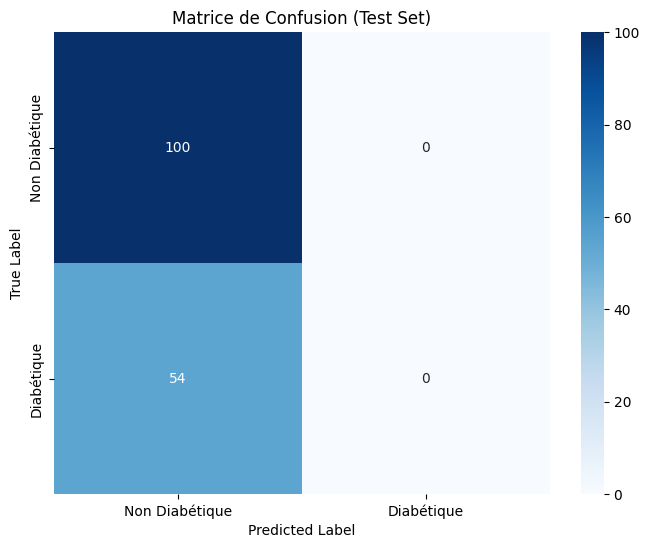

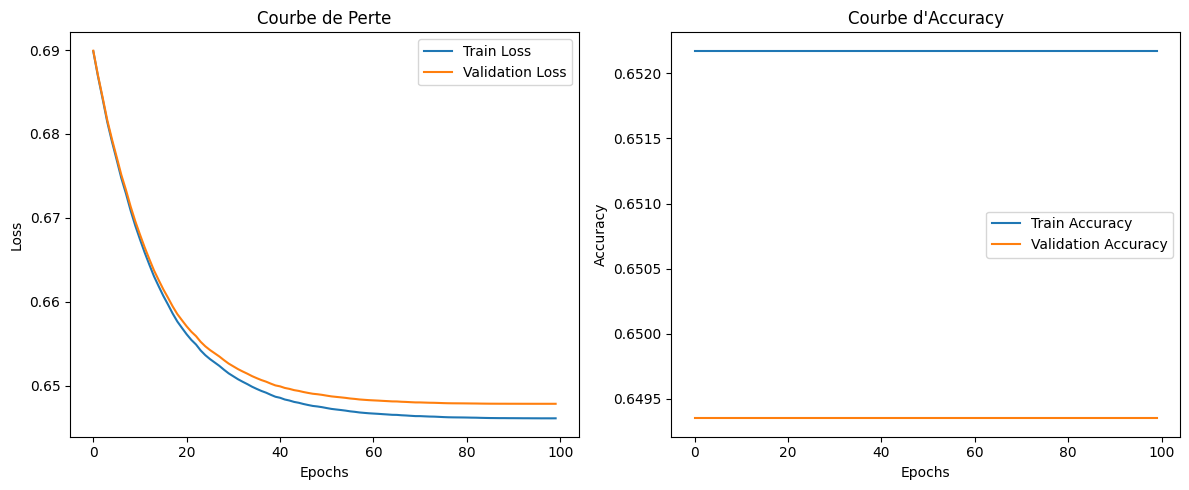

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Fonctions d'activation
def relu(x):
    """
    ReLU activation: max(0, x)
    """
    assert isinstance(x, np.ndarray), "Input to ReLU must be a numpy array"

    result = np.maximum(0, x)
    assert np.all(result >= 0), "ReLU output must be non-negative"
    return result

def relu_derivative(x):
    """
    Derivative of ReLU: 1 if x > 0, else 0
    """
    assert isinstance(x, np.ndarray), "Input to ReLU derivative must be a numpy array"

    result = np.where(x > 0, 1, 0)
    assert np.all((result == 0) | (result == 1)), "ReLU derivative must be 0 or 1"
    return result

def sigmoid(x):
    """
    Sigmoid activation: 1 / (1 + exp(-x))
    """
    assert isinstance(x, np.ndarray), "Input to sigmoid must be a numpy array"

    result = 1 / (1 + np.exp(-x))
    assert np.all((result >= 0) & (result <= 1)), "Sigmoid output must be in [0, 1]"
    return result

def sigmoid_derivative(x):
    """
    Derivative of sigmoid: sigmoid(x) * (1 - sigmoid(x))
    """
    assert isinstance(x, np.ndarray), "Input to sigmoid derivative must be a numpy array"

    s = sigmoid(x)
    result = s * (1 - s)
    assert np.all((result >= 0) & (result <= 0.25)), "Sigmoid derivative must be in [0, 0.25]"
    return result

# Classe Neural Network
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        """
        Initialize the neural network with given layer sizes and learning rate.
        layer_sizes: List of integers [input_size, hidden1_size, ..., output_size]
        """
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements" # [cite: 24]
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers" # [cite: 24]
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number" # [cite: 24]

        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []

        # Initialisation des poids et biais
        np.random.seed(42)
        for i in range(len(layer_sizes) - 1):
            # TODO
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01
            b = np.zeros((1, layer_sizes[i+1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i+1]), f"Weight matrix {i+1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i+1]), f"Bias vector {i+1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)

    def forward(self, X):
        """
        Forward propagation: Z^[l] = A^[l-1]W^[l] + b^[l], A^[l] = g(Z^[l])
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"

        self.activations = [X]
        self.z_values = []
        A = X

        for i in range(len(self.weights) - 1):

            Z = np.dot(A, self.weights[i]) + self.biases[i]
            assert Z.shape == (X.shape[0], self.layer_sizes[i+1]), f"Z^[{i+1}] has incorrect shape"
            self.z_values.append(Z)
            A = relu(Z)
            self.activations.append(A)

        # Output layer
        Z_output = np.dot(A, self.weights[-1]) + self.biases[-1]
        assert Z_output.shape == (X.shape[0], self.layer_sizes[-1]), "Output Z has incorrect shape"
        self.z_values.append(Z_output)
        output = sigmoid(Z_output)
        assert output.shape == (X.shape[0], self.layer_sizes[-1]), "Output A has incorrect shape"
        self.activations.append(output)

        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        """
        Binary Cross-Entropy: J = -1/m * sum(y*log(y_pred) + (1-y)*log(1-y_pred))
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        m = y_true.shape[0]

        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        assert not np.isnan(loss), "Loss computation resulted in NaN"
        return loss

    def compute_accuracy(self, y_true, y_pred_proba):
        """
        Compute accuracy: proportion of correct predictions
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred_proba, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred_proba.shape, "y_true and y_pred must have the same shape"

        y_pred = (y_pred_proba > 0.5).astype(int)
        accuracy = np.mean(y_pred == y_true)
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1"
        return accuracy

    def backward(self, X, y, outputs):
        """
        Backpropagation: compute dW^[l], db^[l] for each layer
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays" # [cite: 28]
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})" # [cite: 28]
        assert y.shape == outputs.shape, "y and outputs must have the same shape"

        m = X.shape[0]
        self.d_weights = [np.zeros_like(w) for w in self.weights]
        self.d_biases = [np.zeros_like(b) for b in self.biases]

        # Output layer
        dZ = outputs - y
        assert dZ.shape == outputs.shape, "dZ for output layer has incorrect shape"
        self.d_weights[-1] = (self.activations[-2].T @ dZ) / m
        self.d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m

        # Hidden layers
        for i in range(len(self.weights) - 2, -1, -1):

            dA_prev = dZ @ self.weights[i+1].T
            dZ = dA_prev * relu_derivative(self.z_values[i])
            self.d_weights[i] = (self.activations[i].T @ dZ) / m
            self.d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m


        pass

    def train(self, X, y, X_val, y_val, epochs, batch_size):
        """
        Train the neural network using mini-batch SGD, with validation
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "X and y must be numpy arrays"
        assert isinstance(X_val, np.ndarray) and isinstance(y_val, np.ndarray), "X_val and y_val must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension ({y.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert X_val.shape[1] == self.layer_sizes[0], f"Validation input dimension ({X_val.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y_val.shape[1] == self.layer_sizes[-1], f"Validation output dimension ({y_val.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer"
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer"

        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]


            epoch_train_loss = 0

            for i in range(0, X.shape[0], batch_size):

                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                outputs = self.forward(X_batch)
                epoch_train_loss += self.compute_loss(y_batch, outputs) * X_batch.shape[0]
                self.backward(X_batch, y_batch, outputs)

                # Update weights and biases
                for j in range(len(self.weights)):
                    self.weights[j] -= self.learning_rate * self.d_weights[j]
                    self.biases[j] -= self.learning_rate * self.d_biases[j]

            # Train metrics
            train_outputs = self.forward(X)
            train_loss = self.compute_loss(y, train_outputs)
            train_accuracy = self.compute_accuracy(y, train_outputs)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            # Validation metrics
            val_outputs = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_outputs)
            val_accuracy = self.compute_accuracy(y_val, val_outputs)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                      f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        """
        Predict class labels (0 or 1)
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"

        probabilities = self.forward(X)
        predictions = (probabilities > 0.5).astype(int)
        assert predictions.shape == (X.shape[0], self.layer_sizes[-1]), "Predictions have incorrect shape"
        return predictions

# Charger et préparer les données
data = pd.read_csv('diabetes.csv')

cols_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace_zeros:
    median_val = data[col].median()
    data[col] = data[col].replace(0, median_val)

X_df = data.drop('Outcome', axis=1)
y_df = data['Outcome']

X = X_df.values
y = y_df.values.reshape(-1, 1)

assert X.shape[0] == y.shape[0], "Number of samples in X and y must match"
assert X.shape[1] == 8, "Expected 8 features in input data"

# Standardisation
# X_std = (X - mu) / sigma

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma
X = X_scaled


X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0], "Train-val-test split sizes must sum to total samples"

# Créer et entraîner le modèle
layer_sizes = [X_train.shape[1], 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=0.01)
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)


# Predictions et évaluation
y_pred_test_proba = nn.forward(X_test)
y_pred_test = (y_pred_test_proba > 0.5).astype(int)


print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred_test))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion (Test Set)')
plt.show()

# Courbes de perte et d'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Courbe de perte
ax1.plot(train_losses, label='Train Loss')
ax1.plot(val_losses, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Courbe de Perte')
ax1.legend()

# Courbe d'accuracy
ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(val_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Courbe d\'Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


Epoch 0, Train Loss: 0.6471, Val Loss: 0.6486, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.6461, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 20, Train Loss: 0.6462, Val Loss: 0.6480, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 30, Train Loss: 0.6456, Val Loss: 0.6474, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 40, Train Loss: 0.5340, Val Loss: 0.5058, Train Acc: 0.7370, Val Acc: 0.7338
Epoch 50, Train Loss: 0.4278, Val Loss: 0.4477, Train Acc: 0.8022, Val Acc: 0.7532
Epoch 60, Train Loss: 0.4087, Val Loss: 0.4549, Train Acc: 0.8152, Val Acc: 0.7792
Epoch 70, Train Loss: 0.4162, Val Loss: 0.4619, Train Acc: 0.8065, Val Acc: 0.7727
Epoch 80, Train Loss: 0.3801, Val Loss: 0.4587, Train Acc: 0.8326, Val Acc: 0.7792
Epoch 90, Train Loss: 0.3516, Val Loss: 0.5074, Train Acc: 0.8391, Val Acc: 0.7662
Epoch 100, Train Loss: 0.3681, Val Loss: 0.5637, Train Acc: 0.8283, Val Acc: 0.7597
Epoch 110, Train Loss: 0.3215, Val Loss: 0.5695, Train Acc: 0.8500, Val Acc: 0.7532
Epo

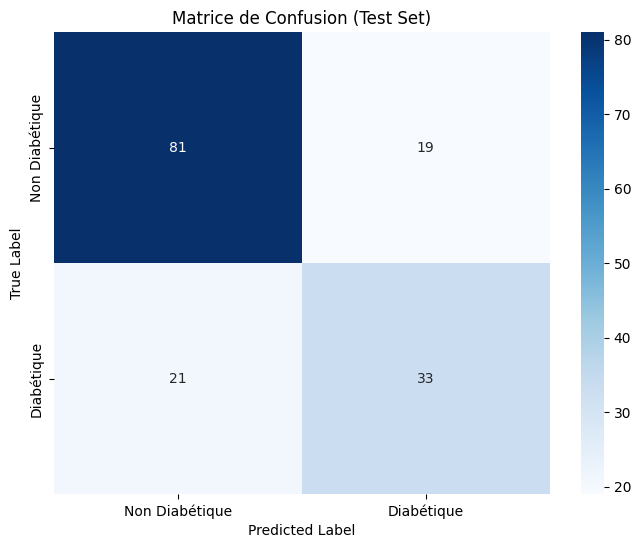

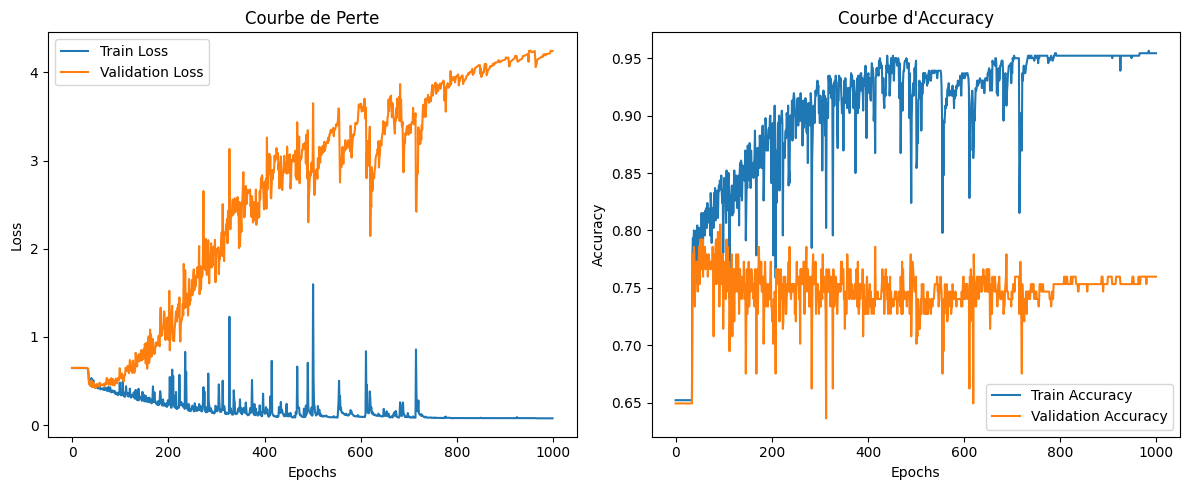

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Fonctions d'activation
def relu(x):
    """
    ReLU activation: max(0, x)
    """
    assert isinstance(x, np.ndarray), "Input to ReLU must be a numpy array"

    result = np.maximum(0, x)
    assert np.all(result >= 0), "ReLU output must be non-negative"
    return result

def relu_derivative(x):
    """
    Derivative of ReLU: 1 if x > 0, else 0
    """
    assert isinstance(x, np.ndarray), "Input to ReLU derivative must be a numpy array"

    result = np.where(x > 0, 1, 0)
    assert np.all((result == 0) | (result == 1)), "ReLU derivative must be 0 or 1"
    return result

def sigmoid(x):
    """
    Sigmoid activation: 1 / (1 + exp(-x))
    """
    assert isinstance(x, np.ndarray), "Input to sigmoid must be a numpy array"

    result = 1 / (1 + np.exp(-x))
    assert np.all((result >= 0) & (result <= 1)), "Sigmoid output must be in [0, 1]"
    return result

def sigmoid_derivative(x):
    """
    Derivative of sigmoid: sigmoid(x) * (1 - sigmoid(x))
    """
    assert isinstance(x, np.ndarray), "Input to sigmoid derivative must be a numpy array"

    s = sigmoid(x)
    result = s * (1 - s)
    assert np.all((result >= 0) & (result <= 0.25)), "Sigmoid derivative must be in [0, 0.25]"
    return result

# Classe Neural Network
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        """
        Initialize the neural network with given layer sizes and learning rate.
        layer_sizes: List of integers [input_size, hidden1_size, ..., output_size]
        """
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements" # [cite: 24]
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers" # [cite: 24]
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number" # [cite: 24]

        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []

        # Initialisation des poids et biais
        np.random.seed(42)
        for i in range(len(layer_sizes) - 1):
            # TODO
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01
            b = np.zeros((1, layer_sizes[i+1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i+1]), f"Weight matrix {i+1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i+1]), f"Bias vector {i+1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)

    def forward(self, X):
        """
        Forward propagation: Z^[l] = A^[l-1]W^[l] + b^[l], A^[l] = g(Z^[l])
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"

        self.activations = [X]
        self.z_values = []
        A = X

        for i in range(len(self.weights) - 1):

            Z = np.dot(A, self.weights[i]) + self.biases[i]
            assert Z.shape == (X.shape[0], self.layer_sizes[i+1]), f"Z^[{i+1}] has incorrect shape"
            self.z_values.append(Z)
            A = relu(Z)
            self.activations.append(A)

        # Output layer
        Z_output = np.dot(A, self.weights[-1]) + self.biases[-1]
        assert Z_output.shape == (X.shape[0], self.layer_sizes[-1]), "Output Z has incorrect shape"
        self.z_values.append(Z_output)
        output = sigmoid(Z_output)
        assert output.shape == (X.shape[0], self.layer_sizes[-1]), "Output A has incorrect shape"
        self.activations.append(output)

        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        """
        Binary Cross-Entropy: J = -1/m * sum(y*log(y_pred) + (1-y)*log(1-y_pred))
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        m = y_true.shape[0]

        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        assert not np.isnan(loss), "Loss computation resulted in NaN"
        return loss

    def compute_accuracy(self, y_true, y_pred_proba):
        """
        Compute accuracy: proportion of correct predictions
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred_proba, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred_proba.shape, "y_true and y_pred must have the same shape"

        y_pred = (y_pred_proba > 0.5).astype(int)
        accuracy = np.mean(y_pred == y_true)
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1"
        return accuracy

    def backward(self, X, y, outputs):
        """
        Backpropagation: compute dW^[l], db^[l] for each layer
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays" # [cite: 28]
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})" # [cite: 28]
        assert y.shape == outputs.shape, "y and outputs must have the same shape"

        m = X.shape[0]
        self.d_weights = [np.zeros_like(w) for w in self.weights]
        self.d_biases = [np.zeros_like(b) for b in self.biases]

        # Output layer
        dZ = outputs - y
        assert dZ.shape == outputs.shape, "dZ for output layer has incorrect shape"
        self.d_weights[-1] = (self.activations[-2].T @ dZ) / m
        self.d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m

        # Hidden layers
        for i in range(len(self.weights) - 2, -1, -1):

            dA_prev = dZ @ self.weights[i+1].T
            dZ = dA_prev * relu_derivative(self.z_values[i])
            self.d_weights[i] = (self.activations[i].T @ dZ) / m
            self.d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m


        pass

    def train(self, X, y, X_val, y_val, epochs, batch_size):
        """
        Train the neural network using mini-batch SGD, with validation
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "X and y must be numpy arrays"
        assert isinstance(X_val, np.ndarray) and isinstance(y_val, np.ndarray), "X_val and y_val must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension ({y.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert X_val.shape[1] == self.layer_sizes[0], f"Validation input dimension ({X_val.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y_val.shape[1] == self.layer_sizes[-1], f"Validation output dimension ({y_val.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer"
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer"

        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]


            epoch_train_loss = 0

            for i in range(0, X.shape[0], batch_size):

                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                outputs = self.forward(X_batch)
                epoch_train_loss += self.compute_loss(y_batch, outputs) * X_batch.shape[0]
                self.backward(X_batch, y_batch, outputs)

                # Update weights and biases
                for j in range(len(self.weights)):
                    self.weights[j] -= self.learning_rate * self.d_weights[j]
                    self.biases[j] -= self.learning_rate * self.d_biases[j]

            # Train metrics
            train_outputs = self.forward(X)
            train_loss = self.compute_loss(y, train_outputs)
            train_accuracy = self.compute_accuracy(y, train_outputs)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            # Validation metrics
            val_outputs = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_outputs)
            val_accuracy = self.compute_accuracy(y_val, val_outputs)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                      f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        """
        Predict class labels (0 or 1)
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"

        probabilities = self.forward(X)
        predictions = (probabilities > 0.5).astype(int)
        assert predictions.shape == (X.shape[0], self.layer_sizes[-1]), "Predictions have incorrect shape"
        return predictions

# Charger et préparer les données
data = pd.read_csv('diabetes.csv')

cols_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace_zeros:
    median_val = data[col].median()
    data[col] = data[col].replace(0, median_val)

X_df = data.drop('Outcome', axis=1)
y_df = data['Outcome']

X = X_df.values
y = y_df.values.reshape(-1, 1)

assert X.shape[0] == y.shape[0], "Number of samples in X and y must match"
assert X.shape[1] == 8, "Expected 8 features in input data"

# Standardisation
# X_std = (X - mu) / sigma

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma
X = X_scaled


X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0], "Train-val-test split sizes must sum to total samples"

# Créer et entraîner le modèle
layer_sizes = [X_train.shape[1], 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=0.5)
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=1000, batch_size=32)


# Predictions et évaluation
y_pred_test_proba = nn.forward(X_test)
y_pred_test = (y_pred_test_proba > 0.5).astype(int)


print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred_test))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion (Test Set)')
plt.show()

# Courbes de perte et d'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Courbe de perte
ax1.plot(train_losses, label='Train Loss')
ax1.plot(val_losses, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Courbe de Perte')
ax1.legend()

# Courbe d'accuracy
ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(val_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Courbe d\'Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


Epoch 0, Train Loss: 0.6471, Val Loss: 0.6486, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.6461, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 20, Train Loss: 0.6462, Val Loss: 0.6480, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 30, Train Loss: 0.6461, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 40, Train Loss: 0.5562, Val Loss: 0.5340, Train Acc: 0.7174, Val Acc: 0.7208
Epoch 50, Train Loss: 0.4361, Val Loss: 0.4476, Train Acc: 0.8043, Val Acc: 0.7727
Epoch 60, Train Loss: 0.4175, Val Loss: 0.4604, Train Acc: 0.8043, Val Acc: 0.7727
Epoch 70, Train Loss: 0.4389, Val Loss: 0.4756, Train Acc: 0.7891, Val Acc: 0.7727
Epoch 80, Train Loss: 0.3819, Val Loss: 0.4713, Train Acc: 0.8196, Val Acc: 0.7857
Epoch 90, Train Loss: 0.3665, Val Loss: 0.4732, Train Acc: 0.8391, Val Acc: 0.7792
Epoch 100, Train Loss: 0.3844, Val Loss: 0.5302, Train Acc: 0.8196, Val Acc: 0.7662
Epoch 110, Train Loss: 0.3628, Val Loss: 0.5057, Train Acc: 0.8304, Val Acc: 0.7922
Epo

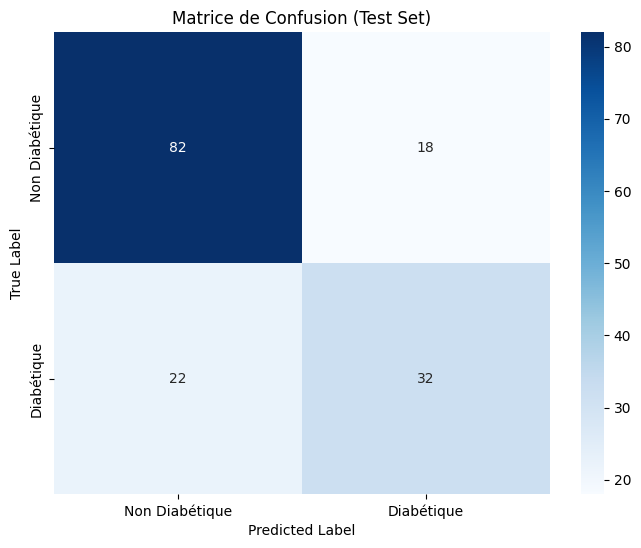

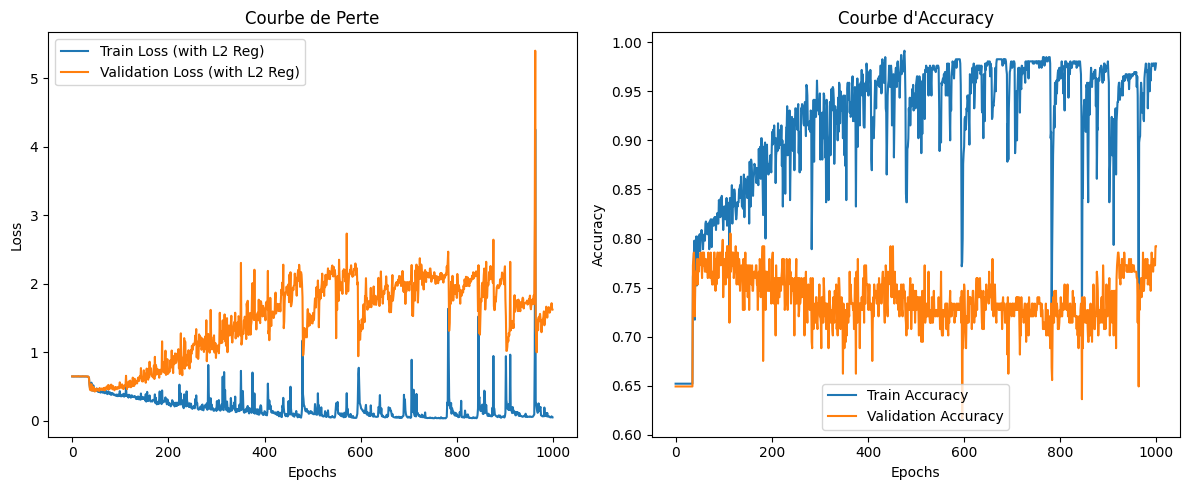


Example with 3 hidden layers (demonstration):
Epoch 0, Train Loss: 0.6898, Val Loss: 0.6898, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.6670, Val Loss: 0.6676, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 20, Train Loss: 0.6562, Val Loss: 0.6571, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 30, Train Loss: 0.6508, Val Loss: 0.6520, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 40, Train Loss: 0.6484, Val Loss: 0.6498, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 50, Train Loss: 0.6473, Val Loss: 0.6488, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 60, Train Loss: 0.6467, Val Loss: 0.6482, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 70, Train Loss: 0.6464, Val Loss: 0.6480, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 80, Train Loss: 0.6463, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 90, Train Loss: 0.6462, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494
Training finished for the 3-hidden-layer example.


In [ ]:
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01, lambda_reg=0.0):
        """
        Initialize the neural network with given layer sizes, learning rate, and L2 regularization coefficient.
        layer_sizes: List of integers [input_size, hidden1_size, ..., output_size]
        lambda_reg: L2 regularization coefficient (lambda)
        """
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements"
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers"
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number"
        assert isinstance(lambda_reg, (int, float)) and lambda_reg >= 0, "Lambda for regularization must be a non-negative number"


        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.weights = []
        self.biases = []

        # Initialisation des poids et biais
        np.random.seed(42)
        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01
            b = np.zeros((1, layer_sizes[i+1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i+1]), f"Weight matrix {i+1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i+1]), f"Bias vector {i+1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)

    def forward(self, X):
        """
        Forward propagation: Z^[l] = A^[l-1]W^[l] + b^[l], A^[l] = g(Z^[l])
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"

        self.activations = [X]
        self.z_values = []
        A = X

        for i in range(len(self.weights) - 1):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            assert Z.shape == (X.shape[0], self.layer_sizes[i+1]), f"Z^[{i+1}] has incorrect shape"
            self.z_values.append(Z)
            A = relu(Z)
            self.activations.append(A)

        # Output layer
        Z_output = np.dot(A, self.weights[-1]) + self.biases[-1]
        assert Z_output.shape == (X.shape[0], self.layer_sizes[-1]), "Output Z has incorrect shape"
        self.z_values.append(Z_output)
        output = sigmoid(Z_output)
        assert output.shape == (X.shape[0], self.layer_sizes[-1]), "Output A has incorrect shape"
        self.activations.append(output)

        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        """
        Binary Cross-Entropy with L2 regularization:
        J = -1/m * sum(y*log(y_pred) + (1-y)*log(1-y_pred)) + lambda/(2*m) * sum(||W[l]||^2_2)
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        m = y_true.shape[0]
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Binary Cross-Entropy loss
        cross_entropy_loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        # L2 regularization term
        l2_reg_term = 0
        if self.lambda_reg > 0:
            for w in self.weights:
                l2_reg_term += np.sum(np.square(w))
            l2_reg_term = (self.lambda_reg / (2 * m)) * l2_reg_term

        total_loss = cross_entropy_loss + l2_reg_term

        assert not np.isnan(total_loss), "Loss computation resulted in NaN"
        return total_loss

    def compute_accuracy(self, y_true, y_pred_proba):
        """
        Compute accuracy: proportion of correct predictions
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred_proba, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred_proba.shape, "y_true and y_pred must have the same shape"
        y_pred = (y_pred_proba > 0.5).astype(int)
        accuracy = np.mean(y_pred == y_true)
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1"
        return accuracy

    def backward(self, X, y, outputs):
        """
        Backpropagation: compute dW^[l], db^[l] for each layer
        Includes L2 regularization gradient.
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape == outputs.shape, "y and outputs must have the same shape"

        m = X.shape[0]
        self.d_weights = [np.zeros_like(w) for w in self.weights]
        self.d_biases = [np.zeros_like(b) for b in self.biases]

        # Output layer
        dZ = outputs - y
        assert dZ.shape == outputs.shape, "dZ for output layer has incorrect shape"

        # Calculate gradient for the last layer weights, including regularization
        self.d_weights[-1] = (self.activations[-2].T @ dZ) / m
        if self.lambda_reg > 0:
             self.d_weights[-1] += (self.lambda_reg / m) * self.weights[-1]

        self.d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m

        # Hidden layers (l = L-1, ..., 1)
        for i in range(len(self.weights) - 2, -1, -1):
            dA_prev = dZ @ self.weights[i+1].T
            dZ = dA_prev * relu_derivative(self.z_values[i])

            # Calculate gradient for hidden layer weights, including regularization
            self.d_weights[i] = (self.activations[i].T @ dZ) / m
            if self.lambda_reg > 0:
                 self.d_weights[i] += (self.lambda_reg / m) * self.weights[i]

            self.d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m

    def train(self, X, y, X_val, y_val, epochs, batch_size):
        """
        Train the neural network using mini-batch SGD, with validation
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "X and y must be numpy arrays"
        assert isinstance(X_val, np.ndarray) and isinstance(y_val, np.ndarray), "X_val and y_val must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension ({y.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert X_val.shape[1] == self.layer_sizes[0], f"Validation input dimension ({X_val.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y_val.shape[1] == self.layer_sizes[-1], f"Validation output dimension ({y_val.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer"
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer"


        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]


            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                outputs = self.forward(X_batch)


                self.backward(X_batch, y_batch, outputs)

                # Update weights and biases
                for j in range(len(self.weights)):
                    self.weights[j] -= self.learning_rate * self.d_weights[j]
                    self.biases[j] -= self.learning_rate * self.d_biases[j]

            # Calculer les pertes et accuracies pour l'entraînement et la validation après chaque epoch
            train_outputs = self.forward(X)
            train_loss = self.compute_loss(y, train_outputs)
            train_accuracy = self.compute_accuracy(y, train_outputs)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            val_outputs = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_outputs)
            val_accuracy = self.compute_accuracy(y_val, val_outputs)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                      f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        """
        Predict class labels (0 or 1)
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"
        probabilities = self.forward(X)
        predictions = (probabilities > 0.5).astype(int)
        assert predictions.shape == (X.shape[0], self.layer_sizes[-1]), "Predictions have incorrect shape"
        return predictions

# Charger et préparer les données
data = pd.read_csv('diabetes.csv')
cols_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace_zeros:
    median_val = data[col].median()
    data[col] = data[col].replace(0, median_val)

X_df = data.drop('Outcome', axis=1)
y_df = data['Outcome']

X = X_df.values
y = y_df.values.reshape(-1, 1)

assert X.shape[0] == y.shape[0], "Number of samples in X and y must match"
assert X.shape[1] == 8, "Expected 8 features in input data"

# Standardisation
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma
X = X_scaled

# Diviser les données en entraînement, validation et test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42) # 0.25 * 0.8 = 0.2

assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0], "Train-val-test split sizes must sum to total samples"

# Créer et entraîner le modèle AVEC REGULARISATION L2

layer_sizes = [X_train.shape[1], 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=0.5, lambda_reg=0.01)
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=1000, batch_size=32)



# Predictions et évaluation
y_pred_test_proba = nn.forward(X_test)
y_pred_test = (y_pred_test_proba > 0.5).astype(int)

print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred_test))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion (Test Set)')
plt.show()

# Courbes de perte et d'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Courbe de perte
ax1.plot(train_losses, label='Train Loss (with L2 Reg)')
ax1.plot(val_losses, label='Validation Loss (with L2 Reg)')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Courbe de Perte')
ax1.legend()

# Courbe d'accuracy
ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(val_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Courbe d\'Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

# Exemple avec 3 couches cachées
print("\nExample with 3 hidden layers (demonstration):")
layer_sizes_3hidden = [X_train.shape[1], 32, 16, 8, 1]
# Create another instance with L2 regularization for consistency
nn_3hidden = NeuralNetwork(layer_sizes_3hidden, learning_rate=0.01, lambda_reg=0.01)
# Assuming we use the same validation set for this example training run
train_losses_3h, val_losses_3h, train_acc_3h, val_acc_3h = nn_3hidden.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)
print("Training finished for the 3-hidden-layer example.")


Epoch 0, Train Loss: 0.5562, Val Loss: 0.5635, Train Acc: 0.7087, Val Acc: 0.7078
Epoch 10, Train Loss: 0.3950, Val Loss: 0.4479, Train Acc: 0.8217, Val Acc: 0.7727
Epoch 20, Train Loss: 0.3526, Val Loss: 0.4448, Train Acc: 0.8435, Val Acc: 0.7792
Epoch 30, Train Loss: 0.3254, Val Loss: 0.4622, Train Acc: 0.8652, Val Acc: 0.7922
Epoch 40, Train Loss: 0.3006, Val Loss: 0.4913, Train Acc: 0.8891, Val Acc: 0.7922
Epoch 50, Train Loss: 0.2768, Val Loss: 0.5135, Train Acc: 0.8826, Val Acc: 0.7922
Epoch 60, Train Loss: 0.2424, Val Loss: 0.5237, Train Acc: 0.8957, Val Acc: 0.8052
Epoch 70, Train Loss: 0.2331, Val Loss: 0.5761, Train Acc: 0.9022, Val Acc: 0.7857
Epoch 80, Train Loss: 0.2175, Val Loss: 0.5874, Train Acc: 0.9174, Val Acc: 0.7987
Epoch 90, Train Loss: 0.2182, Val Loss: 0.6797, Train Acc: 0.9174, Val Acc: 0.7727
Epoch 100, Train Loss: 0.1707, Val Loss: 0.6906, Train Acc: 0.9326, Val Acc: 0.7857
Epoch 110, Train Loss: 0.1572, Val Loss: 0.7447, Train Acc: 0.9413, Val Acc: 0.7922
Epo

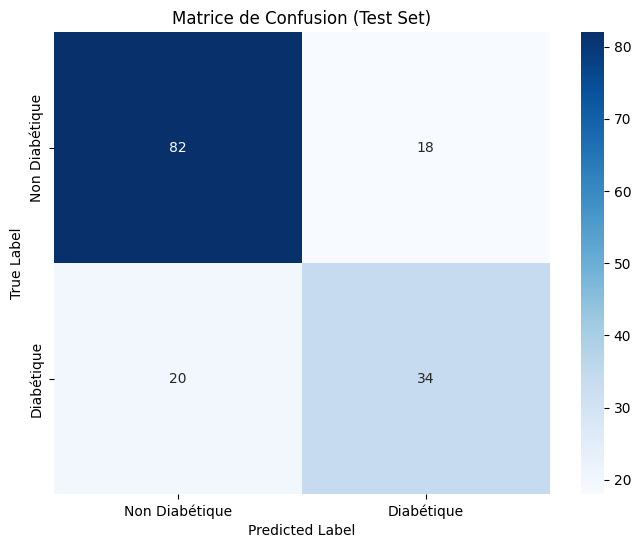

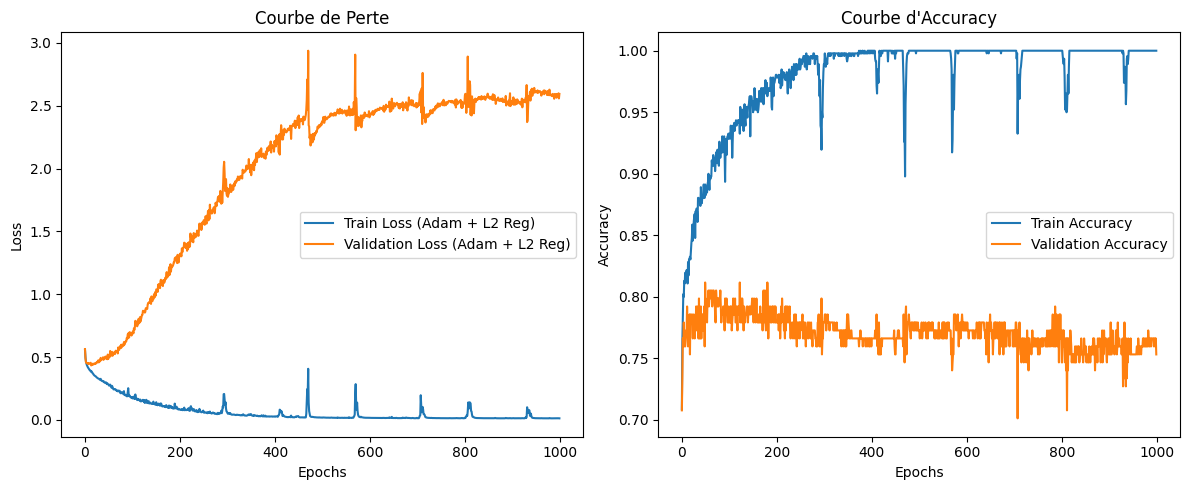


Example with 3 hidden layers (demonstration with Adam):
Epoch 0, Train Loss: 0.6054, Val Loss: 0.6063, Train Acc: 0.6587, Val Acc: 0.6299
Epoch 10, Train Loss: 0.4533, Val Loss: 0.4554, Train Acc: 0.7891, Val Acc: 0.7532
Epoch 20, Train Loss: 0.4070, Val Loss: 0.4613, Train Acc: 0.8239, Val Acc: 0.7662
Epoch 30, Train Loss: 0.3803, Val Loss: 0.4737, Train Acc: 0.8435, Val Acc: 0.7727
Epoch 40, Train Loss: 0.3580, Val Loss: 0.4773, Train Acc: 0.8522, Val Acc: 0.7727
Epoch 50, Train Loss: 0.3367, Val Loss: 0.4862, Train Acc: 0.8565, Val Acc: 0.7792
Epoch 60, Train Loss: 0.3168, Val Loss: 0.4976, Train Acc: 0.8630, Val Acc: 0.7662
Epoch 70, Train Loss: 0.2958, Val Loss: 0.5049, Train Acc: 0.8761, Val Acc: 0.7727
Epoch 80, Train Loss: 0.2707, Val Loss: 0.5242, Train Acc: 0.8913, Val Acc: 0.7662
Epoch 90, Train Loss: 0.2469, Val Loss: 0.5480, Train Acc: 0.9043, Val Acc: 0.7662
Epoch 100, Train Loss: 0.2242, Val Loss: 0.5813, Train Acc: 0.9174, Val Acc: 0.7727
Epoch 110, Train Loss: 0.2018,

In [ ]:
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, lambda_reg=0.0):
        """
        Initialize the neural network with given layer sizes, learning rate, Adam parameters, and L2 regularization.
        layer_sizes: List of integers [input_size, hidden1_size, ..., output_size]
        learning_rate: Learning rate (alpha)
        beta1: Exponential decay rate for the first moment estimates
        beta2: Exponential decay rate for the second moment estimates
        epsilon: A small constant for numerical stability
        lambda_reg: L2 regularization coefficient
        """
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements"
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers"
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number"
        assert isinstance(beta1, (int, float)) and 0 <= beta1 < 1, "Beta1 must be between 0 and 1"
        assert isinstance(beta2, (int, float)) and 0 <= beta2 < 1, "Beta2 must be between 0 and 1"
        assert isinstance(epsilon, (int, float)) and epsilon > 0, "Epsilon must be a positive number"
        assert isinstance(lambda_reg, (int, float)) and lambda_reg >= 0, "Lambda for regularization must be a non-negative number"

        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.lambda_reg = lambda_reg

        self.weights = []
        self.biases = []

        # Adam parameters initialization
        self.v_weights = []
        self.s_weights = []
        self.v_biases = []
        self.s_biases = []

        self.t = 0

        # Initialisation des poids et biais
        np.random.seed(42)
        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2. / layer_sizes[i])
            b = np.zeros((1, layer_sizes[i+1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i+1]), f"Weight matrix {i+1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i+1]), f"Bias vector {i+1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)

            # Initialize Adam parameters for each weight and bias
            self.v_weights.append(np.zeros_like(w))
            self.s_weights.append(np.zeros_like(w))
            self.v_biases.append(np.zeros_like(b))
            self.s_biases.append(np.zeros_like(b))


    def forward(self, X):
        """
        Forward propagation: Z^[l] = A^[l-1]W^[l] + b^[l], A^[l] = g(Z^[l])
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"

        self.activations = [X]
        self.z_values = []
        A = X

        for i in range(len(self.weights) - 1):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            assert Z.shape == (X.shape[0], self.layer_sizes[i+1]), f"Z^[{i+1}] has incorrect shape"
            self.z_values.append(Z)
            A = relu(Z)
            self.activations.append(A)

        # Output layer
        Z_output = np.dot(A, self.weights[-1]) + self.biases[-1]
        assert Z_output.shape == (X.shape[0], self.layer_sizes[-1]), "Output Z has incorrect shape"
        self.z_values.append(Z_output)
        output = sigmoid(Z_output)
        assert output.shape == (X.shape[0], self.layer_sizes[-1]), "Output A has incorrect shape"
        self.activations.append(output)

        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        """
        Binary Cross-Entropy with L2 regularization:
        J = -1/m * sum(y*log(y_pred) + (1-y)*log(1-y_pred)) + lambda/(2*m) * sum(||W[l]||^2_2)
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        m = y_true.shape[0]
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Binary Cross-Entropy loss
        cross_entropy_loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        # L2 regularization term
        l2_reg_term = 0
        if self.lambda_reg > 0:
            for w in self.weights:
                l2_reg_term += np.sum(np.square(w))
            l2_reg_term = (self.lambda_reg / (2 * m)) * l2_reg_term

        total_loss = cross_entropy_loss + l2_reg_term

        assert not np.isnan(total_loss), "Loss computation resulted in NaN"
        return total_loss

    def compute_accuracy(self, y_true, y_pred_proba):
        """
        Compute accuracy: proportion of correct predictions
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred_proba, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred_proba.shape, "y_true and y_pred must have the same shape"
        y_pred = (y_pred_proba > 0.5).astype(int)
        accuracy = np.mean(y_pred == y_true)
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1"
        return accuracy

    def backward(self, X, y, outputs):
        """
        Backpropagation: compute dW^[l], db^[l] for each layer
        Includes L2 regularization gradient.
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape == outputs.shape, "y and outputs must have the same shape"

        m = X.shape[0]
        d_weights = [np.zeros_like(w) for w in self.weights]
        d_biases = [np.zeros_like(b) for b in self.biases]

        # Output layer
        dZ = outputs - y
        assert dZ.shape == outputs.shape, "dZ for output layer has incorrect shape"

        # Calculate gradient for the last layer weights, including regularization
        d_weights[-1] = (self.activations[-2].T @ dZ) / m
        if self.lambda_reg > 0:
             d_weights[-1] += (self.lambda_reg / m) * self.weights[-1]

        d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m

        # Hidden layers (l = L-1, ..., 1)
        for i in range(len(self.weights) - 2, -1, -1):
            dA_prev = dZ @ self.weights[i+1].T
            dZ = dA_prev * relu_derivative(self.z_values[i])

            # Calculate gradient for hidden layer weights, including regularization
            d_weights[i] = (self.activations[i].T @ dZ) / m
            if self.lambda_reg > 0:
                 d_weights[i] += (self.lambda_reg / m) * self.weights[i]
            d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m

        # Return the calculated gradients
        return d_weights, d_biases

    def update_parameters_adam(self, d_weights, d_biases):
        """
        Update weights and biases using the Adam optimizer.
        """
        self.t += 1

        for i in range(len(self.weights)):
            # Update biased first moment estimate
            self.v_weights[i] = self.beta1 * self.v_weights[i] + (1 - self.beta1) * d_weights[i]
            self.v_biases[i] = self.beta1 * self.v_biases[i] + (1 - self.beta1) * d_biases[i]

            # Update biased second moment estimate
            self.s_weights[i] = self.beta2 * self.s_weights[i] + (1 - self.beta2) * np.square(d_weights[i])
            self.s_biases[i] = self.beta2 * self.s_biases[i] + (1 - self.beta2) * np.square(d_biases[i])

            # Compute bias-corrected first moment estimate
            v_corrected_w = self.v_weights[i] / (1 - self.beta1**self.t)
            v_corrected_b = self.v_biases[i] / (1 - self.beta1**self.t)

            # Compute bias-corrected second moment estimate
            s_corrected_w = self.s_weights[i] / (1 - self.beta2**self.t)
            s_corrected_b = self.s_biases[i] / (1 - self.beta2**self.t)

            # Update weights and biases
            self.weights[i] -= self.learning_rate * (v_corrected_w / (np.sqrt(s_corrected_w) + self.epsilon))
            self.biases[i] -= self.learning_rate * (v_corrected_b / (np.sqrt(s_corrected_b) + self.epsilon))


    def train(self, X, y, X_val, y_val, epochs, batch_size):
        """
        Train the neural network using mini-batch Adam, with validation
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "X and y must be numpy arrays"
        assert isinstance(X_val, np.ndarray) and isinstance(y_val, np.ndarray), "X_val and y_val must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension ({y.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert X_val.shape[1] == self.layer_sizes[0], f"Validation input dimension ({X_val.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y_val.shape[1] == self.layer_sizes[-1], f"Validation output dimension ({y_val.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer"
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer"

        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]



            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                outputs = self.forward(X_batch)

                # Calculate gradients for the batch
                d_weights, d_biases = self.backward(X_batch, y_batch, outputs)

                # Update parameters using Adam
                self.update_parameters_adam(d_weights, d_biases)

            # Calculer les pertes et accuracies pour l'entraînement et la validation après chaque epoch
            train_outputs = self.forward(X)
            train_loss = self.compute_loss(y, train_outputs)
            train_accuracy = self.compute_accuracy(y, train_outputs)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            val_outputs = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_outputs)
            val_accuracy = self.compute_accuracy(y_val, val_outputs)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                      f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        """
        Predict class labels (0 or 1)
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"
        probabilities = self.forward(X)
        predictions = (probabilities > 0.5).astype(int)
        assert predictions.shape == (X.shape[0], self.layer_sizes[-1]), "Predictions have incorrect shape"
        return predictions

# Charger et préparer les données
data = pd.read_csv('diabetes.csv')
cols_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace_zeros:
    median_val = data[col].median()
    data[col] = data[col].replace(0, median_val)

X_df = data.drop('Outcome', axis=1)
y_df = data['Outcome']

X = X_df.values
y = y_df.values.reshape(-1, 1)



assert X.shape[0] == y.shape[0], "Number of samples in X and y must match"
assert X.shape[1] == 8, "Expected 8 features in input data"

# Standardisation
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma
X = X_scaled

# Diviser les données en entraînement, validation et test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0], "Train-val-test split sizes must sum to total samples"

# Créer et entraîner le modèle AVEC OPTIMISEUR ADAM ET REGULARISATION L2

layer_sizes = [X_train.shape[1], 16, 8, 1]
# Example: Added Adam parameters and lambda_reg
nn = NeuralNetwork(layer_sizes, learning_rate=0.008, beta1=0.9, beta2=0.999, epsilon=1e-8, lambda_reg=0.01)
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=1000, batch_size=32)



# Predictions et évaluation
y_pred_test_proba = nn.forward(X_test)
y_pred_test = (y_pred_test_proba > 0.5).astype(int)

print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred_test))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion (Test Set)')
plt.show()

# Courbes de perte et d'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Courbe de perte
ax1.plot(train_losses, label='Train Loss (Adam + L2 Reg)')
ax1.plot(val_losses, label='Validation Loss (Adam + L2 Reg)')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Courbe de Perte')
ax1.legend()

# Courbe d'accuracy
ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(val_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Courbe d\'Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

# Exemple avec 3 couches cachées
print("\nExample with 3 hidden layers (demonstration with Adam):")
layer_sizes_3hidden = [X_train.shape[1], 32, 16, 8, 1]
# Create another instance with Adam and L2 regularization for consistency
nn_3hidden = NeuralNetwork(layer_sizes_3hidden, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, lambda_reg=0.01) # Added Adam params and lambda_reg
# Assuming we use the same validation set for this example training run
train_losses_3h, val_losses_3h, train_acc_3h, val_acc_3h = nn_3hidden.train(X_train, y_train, X_val, y_val, epochs=200, batch_size=32) # Increased epochs
print("Training finished for the 3-hidden-layer example with Adam.")




--- Testing Architecture 1: [8, 8, 1] ---
Epoch 0, Train Loss: 0.9702, Val Loss: 0.9352, Train Acc: 0.4065, Val Acc: 0.4026
Epoch 10, Train Loss: 0.6317, Val Loss: 0.5965, Train Acc: 0.6348, Val Acc: 0.6753
Epoch 20, Train Loss: 0.5361, Val Loss: 0.5047, Train Acc: 0.7152, Val Acc: 0.7208
Epoch 30, Train Loss: 0.5041, Val Loss: 0.4738, Train Acc: 0.7457, Val Acc: 0.7468
Epoch 40, Train Loss: 0.4875, Val Loss: 0.4570, Train Acc: 0.7630, Val Acc: 0.7597
Epoch 50, Train Loss: 0.4757, Val Loss: 0.4470, Train Acc: 0.7783, Val Acc: 0.7597
Epoch 60, Train Loss: 0.4663, Val Loss: 0.4404, Train Acc: 0.7891, Val Acc: 0.7597
Epoch 70, Train Loss: 0.4583, Val Loss: 0.4357, Train Acc: 0.7913, Val Acc: 0.7662
Epoch 80, Train Loss: 0.4521, Val Loss: 0.4334, Train Acc: 0.7891, Val Acc: 0.7597
Epoch 90, Train Loss: 0.4463, Val Loss: 0.4328, Train Acc: 0.7891, Val Acc: 0.7662
Epoch 100, Train Loss: 0.4407, Val Loss: 0.4324, Train Acc: 0.7935, Val Acc: 0.7727
Epoch 110, Train Loss: 0.4363, Val Loss: 0.4

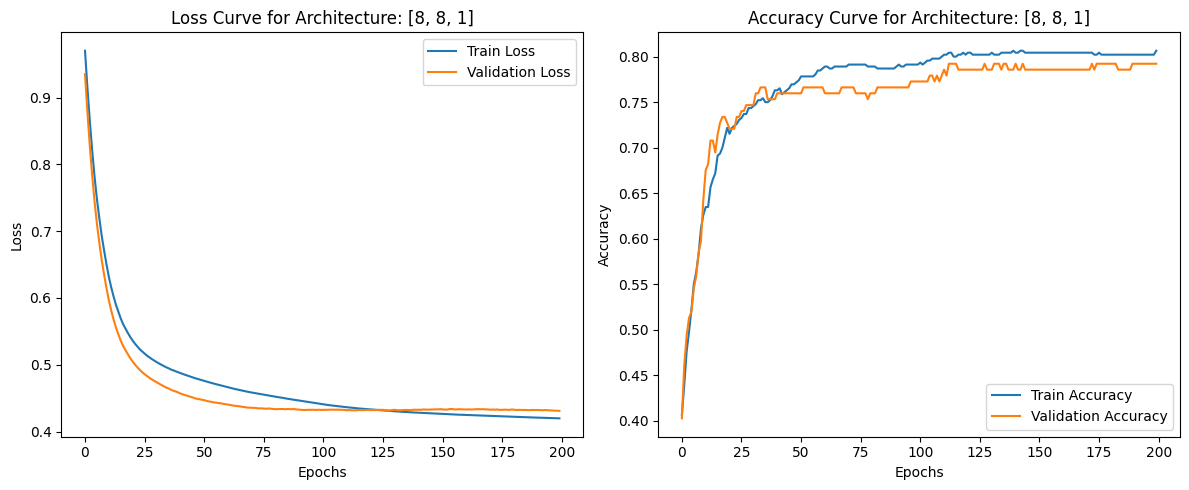


--- Testing Architecture 2: [8, 16, 8, 1] ---
Epoch 0, Train Loss: 0.7410, Val Loss: 0.7734, Train Acc: 0.5978, Val Acc: 0.5584
Epoch 10, Train Loss: 0.5208, Val Loss: 0.5304, Train Acc: 0.7413, Val Acc: 0.7403
Epoch 20, Train Loss: 0.4649, Val Loss: 0.4742, Train Acc: 0.7826, Val Acc: 0.7662
Epoch 30, Train Loss: 0.4393, Val Loss: 0.4607, Train Acc: 0.8065, Val Acc: 0.7792
Epoch 40, Train Loss: 0.4246, Val Loss: 0.4558, Train Acc: 0.8065, Val Acc: 0.7662
Epoch 50, Train Loss: 0.4141, Val Loss: 0.4550, Train Acc: 0.8087, Val Acc: 0.7662
Epoch 60, Train Loss: 0.4056, Val Loss: 0.4550, Train Acc: 0.8087, Val Acc: 0.7597
Epoch 70, Train Loss: 0.3984, Val Loss: 0.4554, Train Acc: 0.8022, Val Acc: 0.7597
Epoch 80, Train Loss: 0.3916, Val Loss: 0.4552, Train Acc: 0.8130, Val Acc: 0.7662
Epoch 90, Train Loss: 0.3851, Val Loss: 0.4548, Train Acc: 0.8217, Val Acc: 0.7662
Epoch 100, Train Loss: 0.3789, Val Loss: 0.4571, Train Acc: 0.8283, Val Acc: 0.7662
Epoch 110, Train Loss: 0.3730, Val Loss:

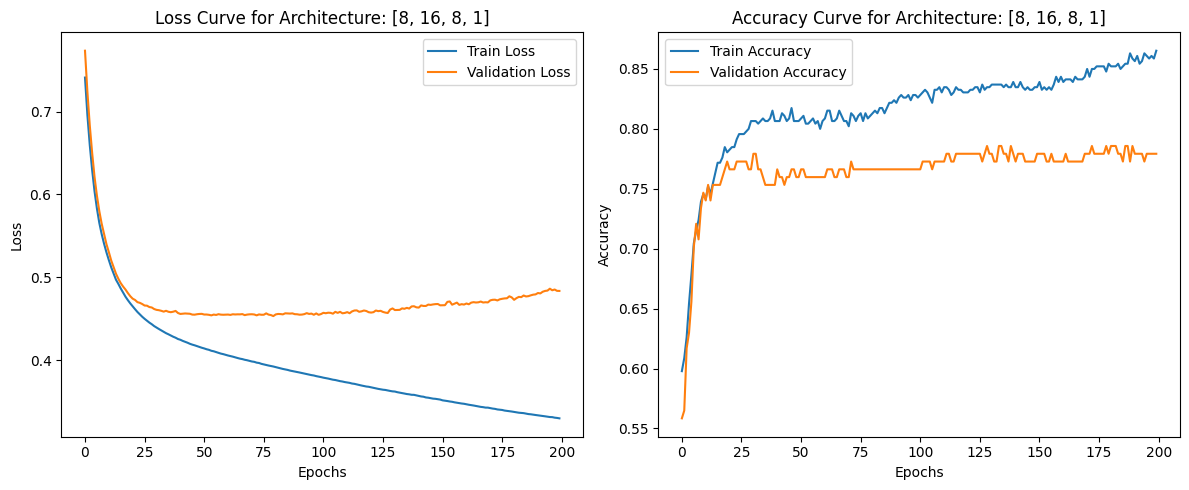


--- Testing Architecture 3: [8, 32, 16, 8, 1] ---
Epoch 0, Train Loss: 0.6054, Val Loss: 0.6063, Train Acc: 0.6587, Val Acc: 0.6299
Epoch 10, Train Loss: 0.4533, Val Loss: 0.4554, Train Acc: 0.7891, Val Acc: 0.7532
Epoch 20, Train Loss: 0.4070, Val Loss: 0.4613, Train Acc: 0.8239, Val Acc: 0.7662
Epoch 30, Train Loss: 0.3803, Val Loss: 0.4737, Train Acc: 0.8435, Val Acc: 0.7727
Epoch 40, Train Loss: 0.3580, Val Loss: 0.4773, Train Acc: 0.8522, Val Acc: 0.7727
Epoch 50, Train Loss: 0.3367, Val Loss: 0.4862, Train Acc: 0.8565, Val Acc: 0.7792
Epoch 60, Train Loss: 0.3168, Val Loss: 0.4976, Train Acc: 0.8630, Val Acc: 0.7662
Epoch 70, Train Loss: 0.2958, Val Loss: 0.5049, Train Acc: 0.8761, Val Acc: 0.7727
Epoch 80, Train Loss: 0.2707, Val Loss: 0.5242, Train Acc: 0.8913, Val Acc: 0.7662
Epoch 90, Train Loss: 0.2469, Val Loss: 0.5480, Train Acc: 0.9043, Val Acc: 0.7662
Epoch 100, Train Loss: 0.2242, Val Loss: 0.5813, Train Acc: 0.9174, Val Acc: 0.7727
Epoch 110, Train Loss: 0.2018, Val L

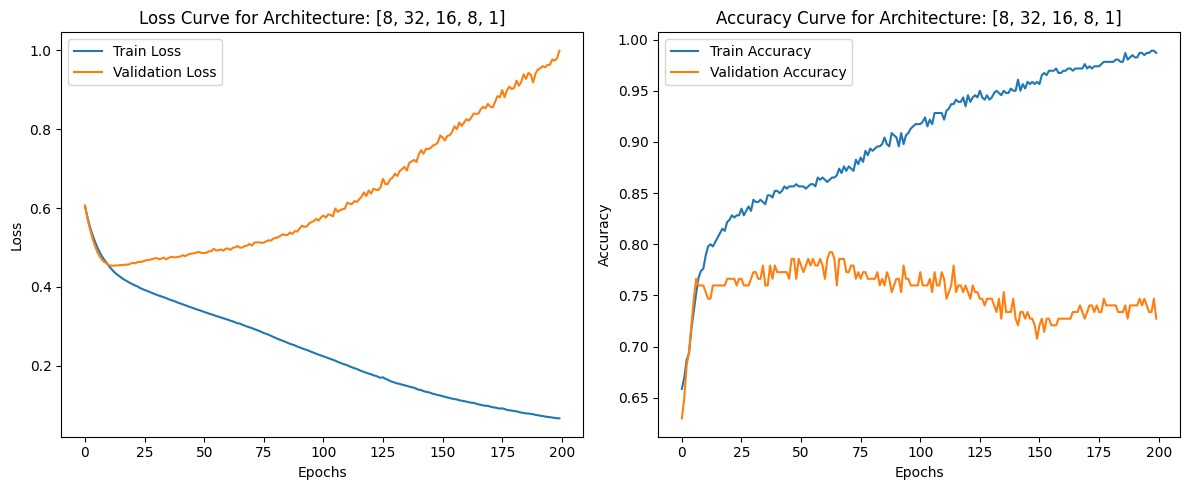


--- Testing Architecture 4: [8, 64, 32, 16, 8, 1] ---
Epoch 0, Train Loss: 0.6623, Val Loss: 0.6610, Train Acc: 0.6457, Val Acc: 0.6169
Epoch 10, Train Loss: 0.3931, Val Loss: 0.4559, Train Acc: 0.8217, Val Acc: 0.7792
Epoch 20, Train Loss: 0.3455, Val Loss: 0.4634, Train Acc: 0.8457, Val Acc: 0.7727
Epoch 30, Train Loss: 0.3025, Val Loss: 0.4782, Train Acc: 0.8587, Val Acc: 0.7662
Epoch 40, Train Loss: 0.2562, Val Loss: 0.4920, Train Acc: 0.8891, Val Acc: 0.7532
Epoch 50, Train Loss: 0.2321, Val Loss: 0.5543, Train Acc: 0.9130, Val Acc: 0.7597
Epoch 60, Train Loss: 0.1724, Val Loss: 0.6020, Train Acc: 0.9326, Val Acc: 0.7468
Epoch 70, Train Loss: 0.1361, Val Loss: 0.6840, Train Acc: 0.9630, Val Acc: 0.7403
Epoch 80, Train Loss: 0.1067, Val Loss: 0.7608, Train Acc: 0.9739, Val Acc: 0.7403
Epoch 90, Train Loss: 0.0852, Val Loss: 0.8491, Train Acc: 0.9804, Val Acc: 0.7273
Epoch 100, Train Loss: 0.0680, Val Loss: 0.9169, Train Acc: 0.9826, Val Acc: 0.7273
Epoch 110, Train Loss: 0.0545, V

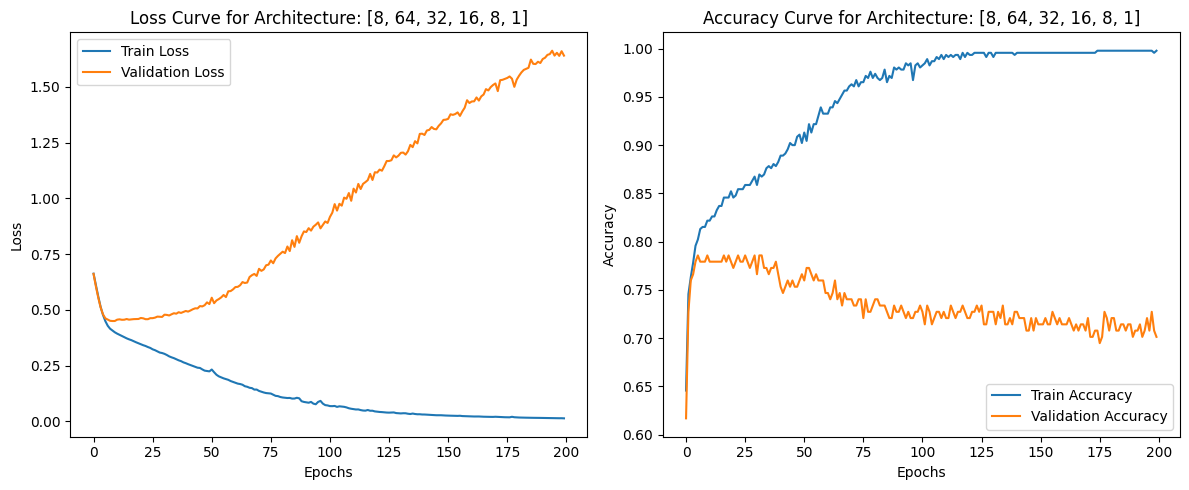


--- Summary of Test Set Performance ---
Architecture: [8, 8, 1]
  Test Loss: 0.5494
  Test Accuracy: 0.7078
--------------------
Architecture: [8, 16, 8, 1]
  Test Loss: 0.5613
  Test Accuracy: 0.7273
--------------------
Architecture: [8, 32, 16, 8, 1]
  Test Loss: 1.0931
  Test Accuracy: 0.7468
--------------------
Architecture: [8, 64, 32, 16, 8, 1]
  Test Loss: 2.3054
  Test Accuracy: 0.7078
--------------------


In [ ]:
# Définir les architectures à tester
architectures = [
    [X_train.shape[1], 8, 1],
    [X_train.shape[1], 16, 8, 1],
    [X_train.shape[1], 32, 16, 8, 1],
    [X_train.shape[1], 64, 32, 16, 8, 1]
]

# Hyperparamètres communs
epochs = 200
batch_size = 32
learning_rate = 0.001
lambda_reg = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8


results = {}

# Tester chaque architecture
for i, layer_sizes in enumerate(architectures):
    print(f"\n--- Testing Architecture {i+1}: {layer_sizes} ---")

    # Créer une nouvelle instance du réseau de neurones avec l'architecture actuelle et Adam

    nn = NeuralNetwork(layer_sizes, learning_rate=learning_rate, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_reg=lambda_reg)

    # Entraîner le modèle
    train_losses, val_losses, train_accuracies, val_accuracies = nn.train(
        X_train, y_train, X_val, y_val, epochs=epochs, batch_size=batch_size
    )

    # Évaluer sur l'ensemble de test
    y_pred_test_proba = nn.forward(X_test)
    y_pred_test = (y_pred_test_proba > 0.5).astype(int)

    test_loss = nn.compute_loss(y_test, y_pred_test_proba)
    test_accuracy = nn.compute_accuracy(y_test, y_pred_test_proba)

    print(f"\nEvaluation on Test Set for Architecture {layer_sizes}:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # Stocker les résultats
    results[str(layer_sizes)] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'classification_report': classification_report(y_test, y_pred_test, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred_test).tolist()
    }

    # Afficher les courbes de perte et d'accuracy pour cette architecture
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(train_losses, label='Train Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Loss Curve for Architecture: {layer_sizes}')
    ax1.legend()

    ax2.plot(train_accuracies, label='Train Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Accuracy Curve for Architecture: {layer_sizes}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Optionnel: Afficher un résumé des performances sur l'ensemble de test pour toutes les architectures
print("\n--- Summary of Test Set Performance ---")
for arch, res in results.items():
    print(f"Architecture: {arch}")
    print(f"  Test Loss: {res['test_loss']:.4f}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")
    print("-" * 20)

Original training set shape: (460, 8) (460, 1)
Original training set class distribution:
 0    300
1    160
Name: count, dtype: int64

Resampled training set shape: (600, 8) (600, 1)
Resampled training set class distribution:
 0    300
1    300
Name: count, dtype: int64

--- Testing Architecture 1: [8, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.6652, Val Loss: 0.6982, Train Acc: 0.6317, Val Acc: 0.5584
Epoch 10, Train Loss: 0.4732, Val Loss: 0.4696, Train Acc: 0.7550, Val Acc: 0.7662
Epoch 20, Train Loss: 0.4538, Val Loss: 0.4764, Train Acc: 0.7683, Val Acc: 0.7532
Epoch 30, Train Loss: 0.4432, Val Loss: 0.4720, Train Acc: 0.7700, Val Acc: 0.7597
Epoch 40, Train Loss: 0.4314, Val Loss: 0.4646, Train Acc: 0.7817, Val Acc: 0.7662
Epoch 50, Train Loss: 0.4195, Val Loss: 0.4727, Train Acc: 0.7883, Val Acc: 0.7792
Epoch 60, Train Loss: 0.4118, Val Loss: 0.4802, Train Acc: 0.8017, Val Acc: 0.7662
Epoch 70, Train Loss: 0.4069, Val Loss: 0.4848, Train Acc: 0.8083, Val Acc: 0.7597
Epoch

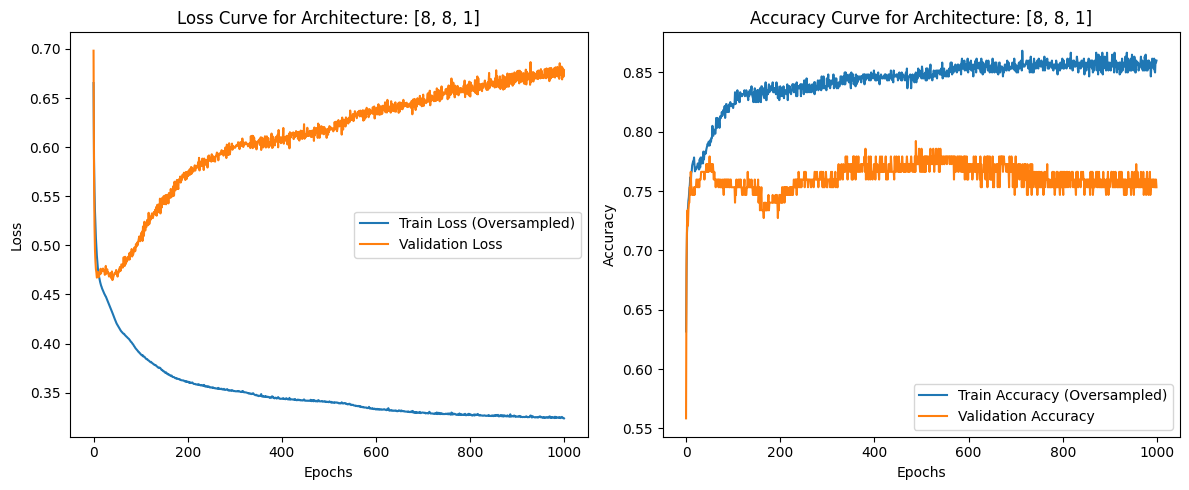


--- Testing Architecture 2: [8, 16, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.6055, Val Loss: 0.6681, Train Acc: 0.6983, Val Acc: 0.6039
Epoch 10, Train Loss: 0.4128, Val Loss: 0.4908, Train Acc: 0.8300, Val Acc: 0.7403
Epoch 20, Train Loss: 0.3631, Val Loss: 0.5237, Train Acc: 0.8550, Val Acc: 0.7403
Epoch 30, Train Loss: 0.3239, Val Loss: 0.5404, Train Acc: 0.8650, Val Acc: 0.7532
Epoch 40, Train Loss: 0.2980, Val Loss: 0.5604, Train Acc: 0.8817, Val Acc: 0.7597
Epoch 50, Train Loss: 0.2768, Val Loss: 0.5976, Train Acc: 0.8950, Val Acc: 0.7532
Epoch 60, Train Loss: 0.2553, Val Loss: 0.6051, Train Acc: 0.9067, Val Acc: 0.7532
Epoch 70, Train Loss: 0.2376, Val Loss: 0.6284, Train Acc: 0.9150, Val Acc: 0.7727
Epoch 80, Train Loss: 0.2185, Val Loss: 0.6778, Train Acc: 0.9200, Val Acc: 0.7662
Epoch 90, Train Loss: 0.1994, Val Loss: 0.7336, Train Acc: 0.9300, Val Acc: 0.7662
Epoch 100, Train Loss: 0.1880, Val Loss: 0.8196, Train Acc: 0.9283, Val Acc: 0.7662
Epoch 110, Train Loss:

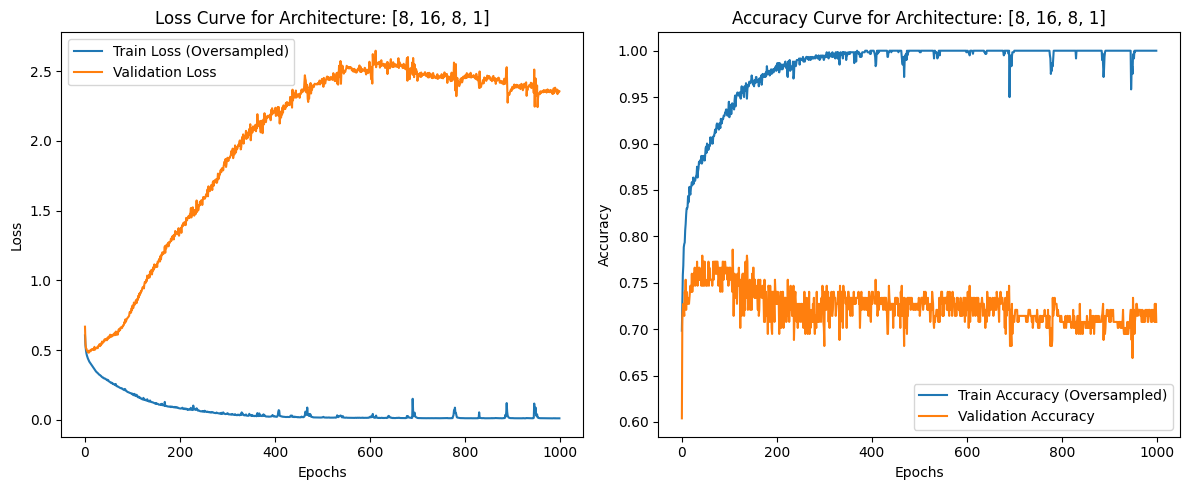


--- Testing Architecture 3: [8, 32, 16, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.5371, Val Loss: 0.5049, Train Acc: 0.7317, Val Acc: 0.7403
Epoch 10, Train Loss: 0.3308, Val Loss: 0.5290, Train Acc: 0.8617, Val Acc: 0.7532
Epoch 20, Train Loss: 0.2558, Val Loss: 0.5971, Train Acc: 0.9033, Val Acc: 0.7532
Epoch 30, Train Loss: 0.1682, Val Loss: 0.7739, Train Acc: 0.9417, Val Acc: 0.7143
Epoch 40, Train Loss: 0.1360, Val Loss: 0.8573, Train Acc: 0.9533, Val Acc: 0.7338
Epoch 50, Train Loss: 0.0690, Val Loss: 1.1164, Train Acc: 0.9800, Val Acc: 0.7078
Epoch 60, Train Loss: 0.0424, Val Loss: 1.4234, Train Acc: 0.9917, Val Acc: 0.7013
Epoch 70, Train Loss: 0.0448, Val Loss: 1.7120, Train Acc: 0.9900, Val Acc: 0.6883
Epoch 80, Train Loss: 0.1993, Val Loss: 1.6457, Train Acc: 0.9417, Val Acc: 0.7143
Epoch 90, Train Loss: 0.0254, Val Loss: 1.8178, Train Acc: 0.9983, Val Acc: 0.6883
Epoch 100, Train Loss: 0.0123, Val Loss: 1.9844, Train Acc: 1.0000, Val Acc: 0.6883
Epoch 110, Train L

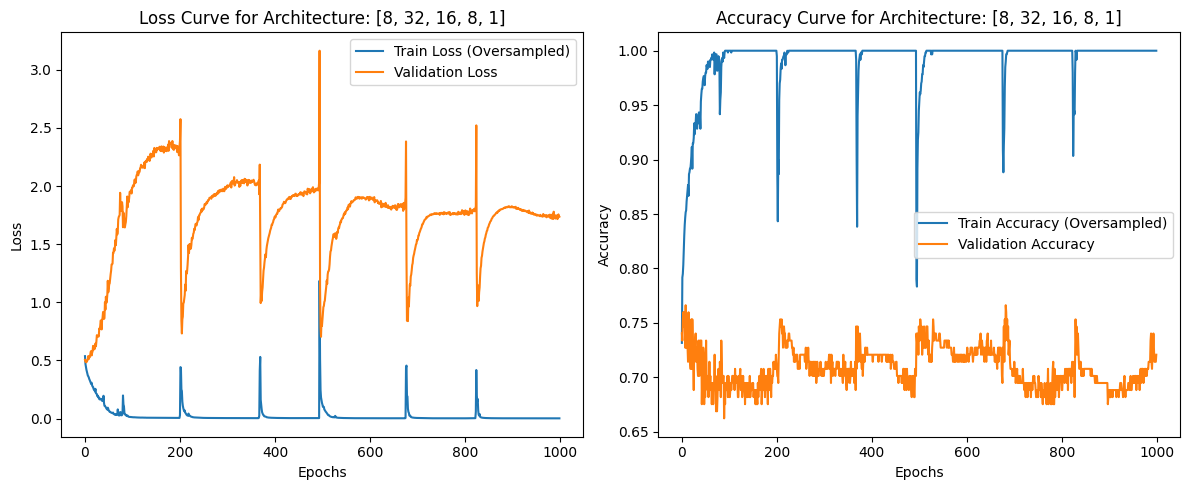


--- Testing Architecture 4: [8, 64, 32, 16, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.4980, Val Loss: 0.5394, Train Acc: 0.7767, Val Acc: 0.7597
Epoch 10, Train Loss: 0.3077, Val Loss: 0.5825, Train Acc: 0.8650, Val Acc: 0.7792
Epoch 20, Train Loss: 0.1150, Val Loss: 0.8789, Train Acc: 0.9683, Val Acc: 0.7468
Epoch 30, Train Loss: 0.1050, Val Loss: 1.5073, Train Acc: 0.9583, Val Acc: 0.7403
Epoch 40, Train Loss: 0.0211, Val Loss: 1.6649, Train Acc: 1.0000, Val Acc: 0.7403
Epoch 50, Train Loss: 0.0124, Val Loss: 1.9619, Train Acc: 1.0000, Val Acc: 0.7143
Epoch 60, Train Loss: 0.1943, Val Loss: 1.9617, Train Acc: 0.9300, Val Acc: 0.7273
Epoch 70, Train Loss: 0.0340, Val Loss: 2.0623, Train Acc: 0.9917, Val Acc: 0.7273
Epoch 80, Train Loss: 0.0059, Val Loss: 2.2502, Train Acc: 1.0000, Val Acc: 0.7273
Epoch 90, Train Loss: 0.0048, Val Loss: 2.3397, Train Acc: 1.0000, Val Acc: 0.7273
Epoch 100, Train Loss: 0.0044, Val Loss: 2.3768, Train Acc: 1.0000, Val Acc: 0.7208
Epoch 110, Tra

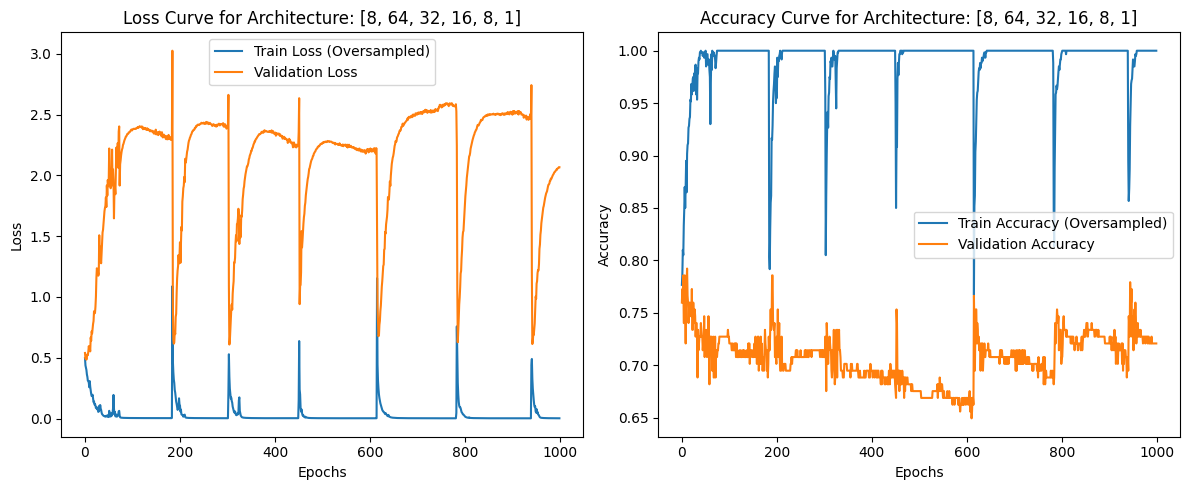


--- Summary of Test Set Performance with Oversampling ---
Architecture: [8, 8, 1]
  Test Loss: 0.8040
  Test Accuracy: 0.6948
--------------------
Architecture: [8, 16, 8, 1]
  Test Loss: 2.2829
  Test Accuracy: 0.7208
--------------------
Architecture: [8, 32, 16, 8, 1]
  Test Loss: 1.9221
  Test Accuracy: 0.7468
--------------------
Architecture: [8, 64, 32, 16, 8, 1]
  Test Loss: 2.5076
  Test Accuracy: 0.7208
--------------------


In [ ]:
# prompt: we want to equilibrate the classes with oversamling

from imblearn.over_sampling import SMOTE

# Check the distribution of the target variable in the training set
print("Original training set shape:", X_train.shape, y_train.shape)
print("Original training set class distribution:\n", pd.Series(y_train.flatten()).value_counts())

# Apply SMOTE to the training data

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.flatten())

# Reshape y_train_res back to a column vector to match the network's output shape
y_train_res = y_train_res.reshape(-1, 1)

print("\nResampled training set shape:", X_train_res.shape, y_train_res.shape)
print("Resampled training set class distribution:\n", pd.Series(y_train_res.flatten()).value_counts())




# Définir les architectures à tester
architectures = [
    [X_train_res.shape[1], 8, 1],
    [X_train_res.shape[1], 16, 8, 1],
    [X_train_res.shape[1], 32, 16, 8, 1],
    [X_train_res.shape[1], 64, 32, 16, 8, 1]
]

# Hyperparamètres communs
epochs = 1000
batch_size = 32
learning_rate = 0.005
lambda_reg = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

results = {}

# Tester chaque architecture avec les données suréchantillonnées
for i, layer_sizes in enumerate(architectures):
    print(f"\n--- Testing Architecture {i+1}: {layer_sizes} with Oversampling ---")

    # Créer une nouvelle instance du réseau de neurones avec l'architecture actuelle et Adam
    nn = NeuralNetwork(layer_sizes, learning_rate=learning_rate, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_reg=lambda_reg)

    # Entraîner le modèle avec les données d'entraînement suréchantillonnées
    train_losses, val_losses, train_accuracies, val_accuracies = nn.train(
        X_train_res, y_train_res, X_val, y_val, epochs=epochs, batch_size=batch_size
    )

    # Évaluer sur l'ensemble de test (NON-oversampled)
    y_pred_test_proba = nn.forward(X_test)
    y_pred_test = (y_pred_test_proba > 0.5).astype(int)

    test_loss = nn.compute_loss(y_test, y_pred_test_proba)
    test_accuracy = nn.compute_accuracy(y_test, y_pred_test_proba)

    print(f"\nEvaluation on Test Set for Architecture {layer_sizes}:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # Stocker les résultats
    results[str(layer_sizes)] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'classification_report': classification_report(y_test, y_pred_test, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred_test).tolist()
    }

    # Afficher les courbes de perte et d'accuracy pour cette architecture
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(train_losses, label='Train Loss (Oversampled)')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Loss Curve for Architecture: {layer_sizes}')
    ax1.legend()

    ax2.plot(train_accuracies, label='Train Accuracy (Oversampled)')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Accuracy Curve for Architecture: {layer_sizes}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Optionnel: Afficher un résumé des performances sur l'ensemble de test pour toutes les architectures
print("\n--- Summary of Test Set Performance with Oversampling ---")
for arch, res in results.items():
    print(f"Architecture: {arch}")
    print(f"  Test Loss: {res['test_loss']:.4f}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")
    print("-" * 20)


In [ ]:


# tester l'architecture avec 3 couches cachées
print("\nTesting the architecture with 3 hidden layers as requested:")
layer_sizes_test = [X_train.shape[1], 32, 16, 8, 1]
nn_test = NeuralNetwork(layer_sizes_test, learning_rate=0.5, beta1=0.9, beta2=0.999, epsilon=1e-8, lambda_reg=0.01)
train_losses_test, val_losses_test, train_acc_test, val_acc_test = nn_test.train(X_train_res, y_train_res, X_val, y_val, epochs=epochs, batch_size=batch_size)
print("Testing finished for the 3-hidden-layer architecture with Adam and Oversampling.")

# Évaluer sur l'ensemble de test
y_pred_test_proba_test = nn_test.forward(X_test)
y_pred_test_test = (y_pred_test_proba_test > 0.5).astype(int)

test_loss_test = nn_test.compute_loss(y_test, y_pred_test_proba_test)
test_accuracy_test = nn_test.compute_accuracy(y_test, y_pred_test_proba_test)

print(f"\nEvaluation on Test Set for Tested Architecture {layer_sizes_test}:")
print(f"Test Loss: {test_loss_test:.4f}")
print(f"Test Accuracy: {test_accuracy_test:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_test))

# Matrice de confusion pour l'architecture testée
cm_test = confusion_matrix(y_test, y_pred_test_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matrice de Confusion (Test Set) for {layer_sizes_test}')
plt.show()

# Courbes de perte et d'accuracy pour l'architecture testée
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(train_losses_test, label='Train Loss (Oversampled)')
ax1.plot(val_losses_test, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title(f'Loss Curve for Architecture: {layer_sizes_test}')
ax1.legend()

ax2.plot(train_acc_test, label='Train Accuracy (Oversampled)')
ax2.plot(val_acc_test, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title(f'Accuracy Curve for Architecture: {layer_sizes_test}')
ax2.legend()

plt.tight_layout()
plt.show()


Testing the architecture with 3 hidden layers as requested:


NameError: name 'X_train' is not defined

In [ ]:
# prompt: Ajouter une validation croisée pour évaluer la robustesse du modèle

from sklearn.model_selection import StratifiedKFold

# Number of folds for cross-validation
n_splits = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results from each fold
cv_train_losses = []
cv_val_losses = []
cv_train_accuracies = []
cv_val_accuracies = []

# We will train and evaluate a model on each fold
print(f"\n--- Running {n_splits}-Fold Cross-Validation ---")

# Combine training and validation sets for CV
X_combined_train_val = np.concatenate((X_train_res, X_val), axis=0)
y_combined_train_val = np.concatenate((y_train_res, y_val), axis=0)

# Reshape y_combined_train_val to 1D for StratifiedKFold
y_combined_train_val_flat = y_combined_train_val.flatten()


# Define the architecture and hyperparameters for CV

cv_layer_sizes = [X_combined_train_val.shape[1], 32, 16, 8, 1]
cv_epochs = 200
cv_batch_size = 32
cv_learning_rate = 0.001
cv_lambda_reg = 0.01
cv_beta1 = 0.9
cv_beta2 = 0.999
cv_epsilon = 1e-8

fold = 0
# Iterate over each fold
for train_index, val_index in skf.split(X_combined_train_val, y_combined_train_val_flat):
    fold += 1
    print(f"\n--- Fold {fold}/{n_splits} ---")

    # Split data into train and validation sets for the current fold
    X_train_fold, X_val_fold = X_combined_train_val[train_index], X_combined_train_val[val_index]
    y_train_fold, y_val_fold = y_combined_train_val[train_index].reshape(-1, 1), y_combined_train_val[val_index].reshape(-1, 1) # Reshape back to column vector

    # Create a new instance of the neural network for the current fold

    nn_fold = NeuralNetwork(cv_layer_sizes, learning_rate=cv_learning_rate, beta1=cv_beta1, beta2=cv_beta2, epsilon=cv_epsilon, lambda_reg=cv_lambda_reg)


    fold_train_losses, fold_val_losses, fold_train_accuracies, fold_val_accuracies = nn_fold.train(
        X_train_fold, y_train_fold, X_val_fold, y_val_fold, epochs=cv_epochs, batch_size=cv_batch_size
    )

    # Store the final loss and accuracy for this fold
    cv_train_losses.append(fold_train_losses[-1])
    cv_val_losses.append(fold_val_losses[-1])
    cv_train_accuracies.append(fold_train_accuracies[-1])
    cv_val_accuracies.append(fold_val_accuracies[-1])

# Calculate and print the average performance across all folds
print("\n--- Cross-Validation Results ---")
print(f"Average Training Loss: {np.mean(cv_train_losses):.4f} +/- {np.std(cv_train_losses):.4f}")
print(f"Average Validation Loss: {np.mean(cv_val_losses):.4f} +/- {np.std(cv_val_losses):.4f}")
print(f"Average Training Accuracy: {np.mean(cv_train_accuracies):.4f} +/- {np.std(cv_train_accuracies):.4f}")
print(f"Average Validation Accuracy: {np.mean(cv_val_accuracies):.4f} +/- {np.std(cv_val_accuracies):.4f}")






--- Running 5-Fold Cross-Validation ---


NameError: name 'np' is not defined

Check the distribution of the target variable in the training set
Original training set shape: (460, 8) (460, 1)
Original training set class distribution:
 0    300
1    160
Name: count, dtype: int64

Resampled training set shape: (600, 8) (600, 1)
Resampled training set class distribution:
 0    300
1    300
Name: count, dtype: int64

--- Testing Architecture 1: [8, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.6652, Val Loss: 0.6982, Train Acc: 0.6317, Val Acc: 0.5584
Epoch 10, Train Loss: 0.4732, Val Loss: 0.4696, Train Acc: 0.7550, Val Acc: 0.7662
Epoch 20, Train Loss: 0.4538, Val Loss: 0.4764, Train Acc: 0.7683, Val Acc: 0.7532
Epoch 30, Train Loss: 0.4432, Val Loss: 0.4720, Train Acc: 0.7700, Val Acc: 0.7597
Epoch 40, Train Loss: 0.4314, Val Loss: 0.4646, Train Acc: 0.7817, Val Acc: 0.7662
Epoch 50, Train Loss: 0.4195, Val Loss: 0.4727, Train Acc: 0.7883, Val Acc: 0.7792
Epoch 60, Train Loss: 0.4118, Val Loss: 0.4802, Train Acc: 0.8017, Val Acc: 0.7662
Epoch 70, Train Loss: 

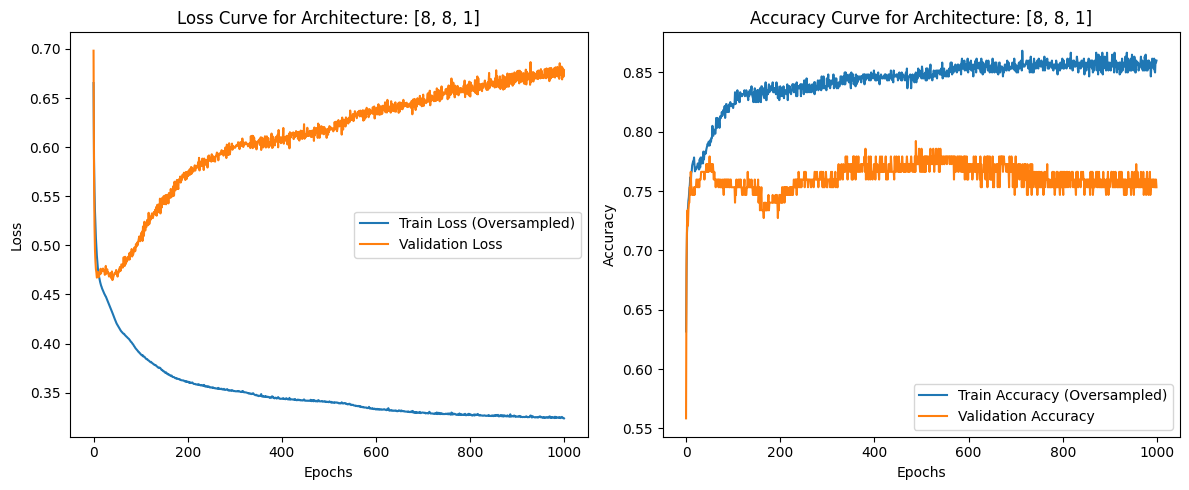


--- Testing Architecture 2: [8, 16, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.6055, Val Loss: 0.6681, Train Acc: 0.6983, Val Acc: 0.6039
Epoch 10, Train Loss: 0.4128, Val Loss: 0.4908, Train Acc: 0.8300, Val Acc: 0.7403
Epoch 20, Train Loss: 0.3631, Val Loss: 0.5237, Train Acc: 0.8550, Val Acc: 0.7403
Epoch 30, Train Loss: 0.3239, Val Loss: 0.5404, Train Acc: 0.8650, Val Acc: 0.7532
Epoch 40, Train Loss: 0.2980, Val Loss: 0.5604, Train Acc: 0.8817, Val Acc: 0.7597
Epoch 50, Train Loss: 0.2768, Val Loss: 0.5976, Train Acc: 0.8950, Val Acc: 0.7532
Epoch 60, Train Loss: 0.2553, Val Loss: 0.6051, Train Acc: 0.9067, Val Acc: 0.7532
Epoch 70, Train Loss: 0.2376, Val Loss: 0.6284, Train Acc: 0.9150, Val Acc: 0.7727
Epoch 80, Train Loss: 0.2185, Val Loss: 0.6778, Train Acc: 0.9200, Val Acc: 0.7662
Epoch 90, Train Loss: 0.1994, Val Loss: 0.7336, Train Acc: 0.9300, Val Acc: 0.7662
Epoch 100, Train Loss: 0.1880, Val Loss: 0.8196, Train Acc: 0.9283, Val Acc: 0.7662
Epoch 110, Train Loss:

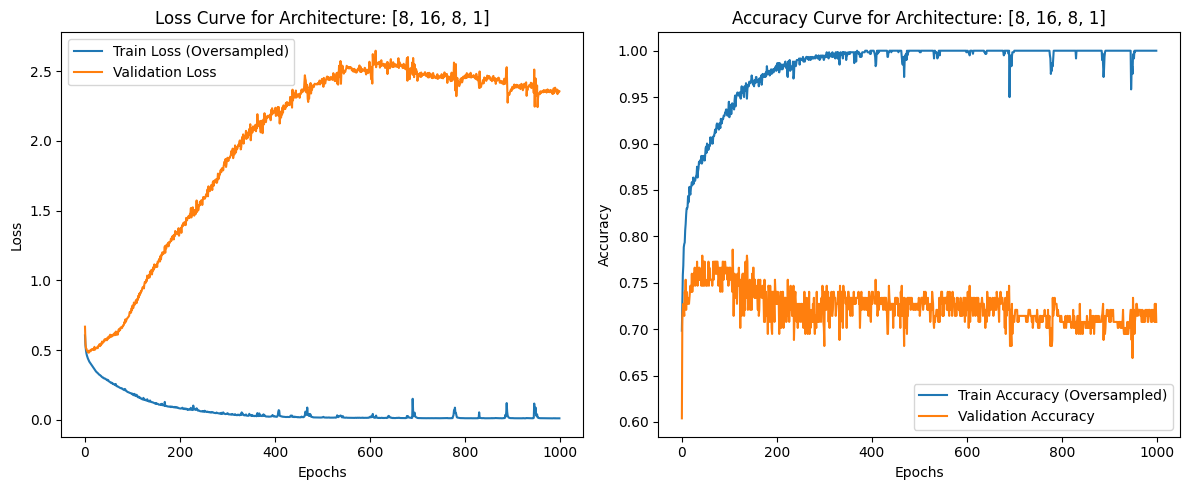


--- Testing Architecture 3: [8, 32, 16, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.5371, Val Loss: 0.5049, Train Acc: 0.7317, Val Acc: 0.7403
Epoch 10, Train Loss: 0.3308, Val Loss: 0.5290, Train Acc: 0.8617, Val Acc: 0.7532
Epoch 20, Train Loss: 0.2558, Val Loss: 0.5971, Train Acc: 0.9033, Val Acc: 0.7532
Epoch 30, Train Loss: 0.1682, Val Loss: 0.7739, Train Acc: 0.9417, Val Acc: 0.7143
Epoch 40, Train Loss: 0.1360, Val Loss: 0.8573, Train Acc: 0.9533, Val Acc: 0.7338
Epoch 50, Train Loss: 0.0690, Val Loss: 1.1164, Train Acc: 0.9800, Val Acc: 0.7078
Epoch 60, Train Loss: 0.0424, Val Loss: 1.4234, Train Acc: 0.9917, Val Acc: 0.7013
Epoch 70, Train Loss: 0.0448, Val Loss: 1.7120, Train Acc: 0.9900, Val Acc: 0.6883
Epoch 80, Train Loss: 0.1993, Val Loss: 1.6457, Train Acc: 0.9417, Val Acc: 0.7143
Epoch 90, Train Loss: 0.0254, Val Loss: 1.8178, Train Acc: 0.9983, Val Acc: 0.6883
Epoch 100, Train Loss: 0.0123, Val Loss: 1.9844, Train Acc: 1.0000, Val Acc: 0.6883
Epoch 110, Train L

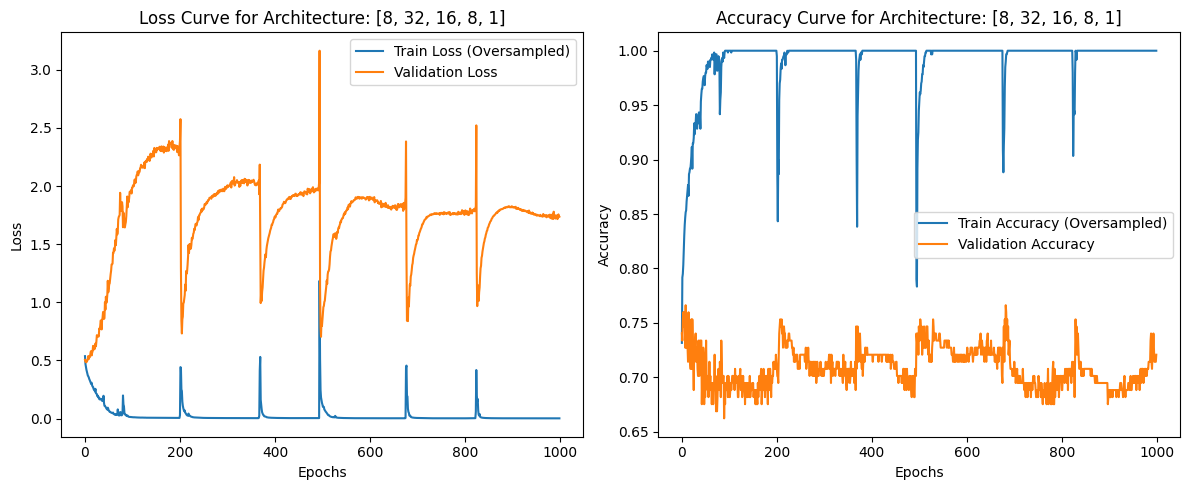


--- Testing Architecture 4: [8, 64, 32, 16, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.4980, Val Loss: 0.5394, Train Acc: 0.7767, Val Acc: 0.7597
Epoch 10, Train Loss: 0.3077, Val Loss: 0.5825, Train Acc: 0.8650, Val Acc: 0.7792
Epoch 20, Train Loss: 0.1150, Val Loss: 0.8789, Train Acc: 0.9683, Val Acc: 0.7468
Epoch 30, Train Loss: 0.1050, Val Loss: 1.5073, Train Acc: 0.9583, Val Acc: 0.7403
Epoch 40, Train Loss: 0.0211, Val Loss: 1.6649, Train Acc: 1.0000, Val Acc: 0.7403
Epoch 50, Train Loss: 0.0124, Val Loss: 1.9619, Train Acc: 1.0000, Val Acc: 0.7143
Epoch 60, Train Loss: 0.1943, Val Loss: 1.9617, Train Acc: 0.9300, Val Acc: 0.7273
Epoch 70, Train Loss: 0.0340, Val Loss: 2.0623, Train Acc: 0.9917, Val Acc: 0.7273
Epoch 80, Train Loss: 0.0059, Val Loss: 2.2502, Train Acc: 1.0000, Val Acc: 0.7273
Epoch 90, Train Loss: 0.0048, Val Loss: 2.3397, Train Acc: 1.0000, Val Acc: 0.7273
Epoch 100, Train Loss: 0.0044, Val Loss: 2.3768, Train Acc: 1.0000, Val Acc: 0.7208
Epoch 110, Tra

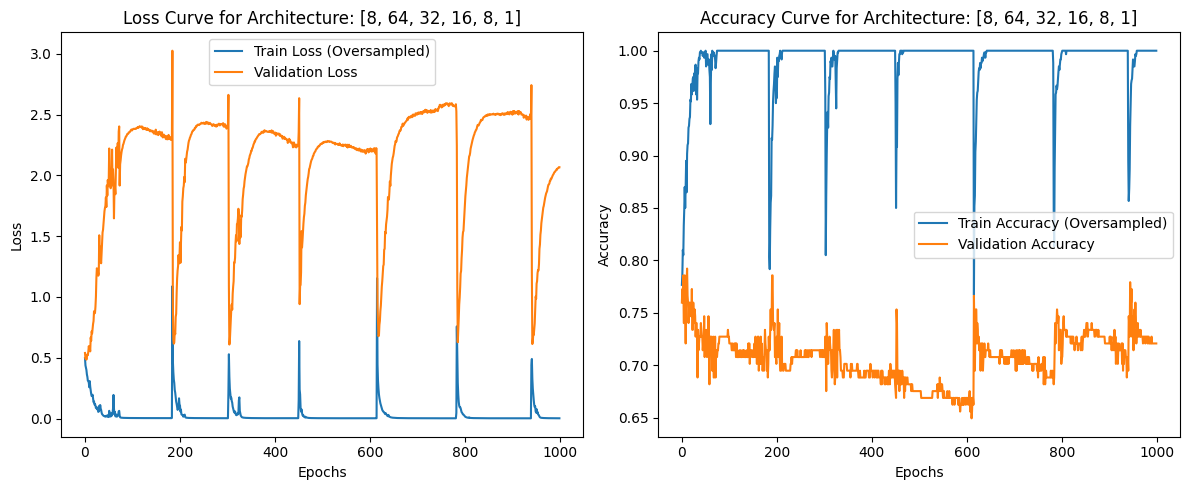


--- Summary of Test Set Performance with Oversampling ---
Architecture: [8, 8, 1]
  Test Loss: 0.8040
  Test Accuracy: 0.6948
--------------------
Architecture: [8, 16, 8, 1]
  Test Loss: 2.2829
  Test Accuracy: 0.7208
--------------------
Architecture: [8, 32, 16, 8, 1]
  Test Loss: 1.9221
  Test Accuracy: 0.7468
--------------------
Architecture: [8, 64, 32, 16, 8, 1]
  Test Loss: 2.5076
  Test Accuracy: 0.7208
--------------------

Testing the architecture with 3 hidden layers as requested:
Epoch 0, Train Loss: 0.7256, Val Loss: 0.7151, Train Acc: 0.5000, Val Acc: 0.6494
Epoch 10, Train Loss: 0.7040, Val Loss: 0.7350, Train Acc: 0.5000, Val Acc: 0.6494
Epoch 20, Train Loss: 0.6989, Val Loss: 0.6842, Train Acc: 0.5000, Val Acc: 0.6494
Epoch 30, Train Loss: 0.7070, Val Loss: 0.6622, Train Acc: 0.5000, Val Acc: 0.6494
Epoch 40, Train Loss: 0.6964, Val Loss: 0.7199, Train Acc: 0.5000, Val Acc: 0.3506
Epoch 50, Train Loss: 0.7074, Val Loss: 0.7582, Train Acc: 0.5000, Val Acc: 0.3506
Epo

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


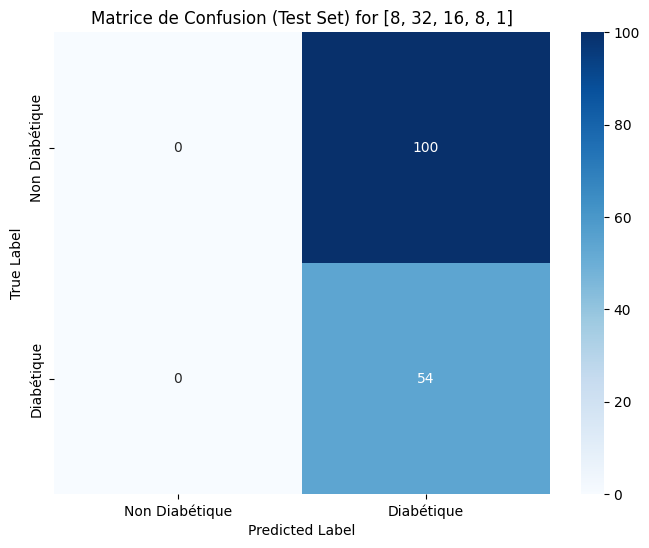

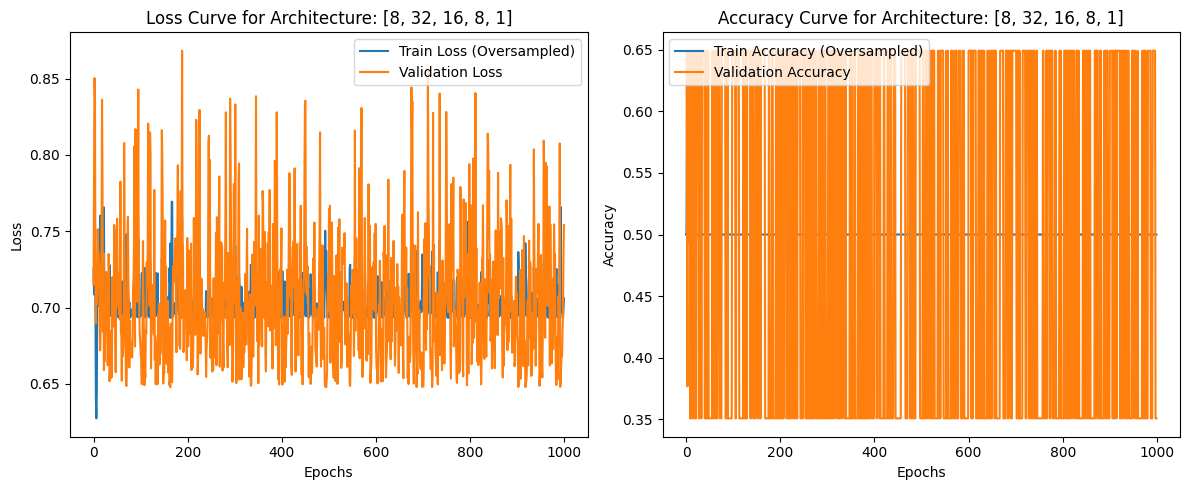


--- Running 5-Fold Cross-Validation ---

--- Fold 1/5 ---
Epoch 0, Train Loss: 0.7258, Val Loss: 0.8117, Train Acc: 0.4693, Val Acc: 0.4702
Epoch 10, Train Loss: 0.7415, Val Loss: 0.7740, Train Acc: 0.5307, Val Acc: 0.5298
Epoch 20, Train Loss: 0.6963, Val Loss: 0.7055, Train Acc: 0.4693, Val Acc: 0.4702
Epoch 30, Train Loss: 0.6955, Val Loss: 0.6988, Train Acc: 0.4693, Val Acc: 0.4702
Epoch 40, Train Loss: 0.6944, Val Loss: 0.6959, Train Acc: 0.4693, Val Acc: 0.4702
Epoch 50, Train Loss: 0.7185, Val Loss: 0.7189, Train Acc: 0.4693, Val Acc: 0.4702
Epoch 60, Train Loss: 0.6975, Val Loss: 0.6978, Train Acc: 0.4693, Val Acc: 0.4702
Epoch 70, Train Loss: 0.6962, Val Loss: 0.6968, Train Acc: 0.5307, Val Acc: 0.5298
Epoch 80, Train Loss: 0.6923, Val Loss: 0.6927, Train Acc: 0.5307, Val Acc: 0.5298
Epoch 90, Train Loss: 0.7193, Val Loss: 0.7191, Train Acc: 0.4693, Val Acc: 0.4702
Epoch 100, Train Loss: 0.6953, Val Loss: 0.6953, Train Acc: 0.4693, Val Acc: 0.4702
Epoch 110, Train Loss: 0.691

In [ ]:
# prompt: je veux équilibrer les classe avec l oversampling

print("Check the distribution of the target variable in the training set")
print("Original training set shape:", X_train.shape, y_train.shape)
print("Original training set class distribution:\n", pd.Series(y_train.flatten()).value_counts())

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.flatten())

# Reshape y_train_res back to a column vector to match the network's output shape
y_train_res = y_train_res.reshape(-1, 1)

print("\nResampled training set shape:", X_train_res.shape, y_train_res.shape)
print("Resampled training set class distribution:\n", pd.Series(y_train_res.flatten()).value_counts())

# The rest of your code for training and evaluating with the resampled data follows from here.
# You would typically train your model using X_train_res and y_train_res
# and continue to evaluate on X_val, y_val and X_test, y_test (which are NOT oversampled).

# Define the architectures to test with oversampled data
architectures = [
    [X_train_res.shape[1], 8, 1],
    [X_train_res.shape[1], 16, 8, 1],
    [X_train_res.shape[1], 32, 16, 8, 1],
    [X_train_res.shape[1], 64, 32, 16, 8, 1]
]

# Common hyperparameters
epochs = 1000
batch_size = 32
learning_rate = 0.005
lambda_reg = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

results = {}

# Test each architecture with the oversampled data
for i, layer_sizes in enumerate(architectures):
    print(f"\n--- Testing Architecture {i+1}: {layer_sizes} with Oversampling ---")

    # Create a new instance of the neural network with the current architecture and Adam
    nn = NeuralNetwork(layer_sizes, learning_rate=learning_rate, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_reg=lambda_reg)

    # Train the model with the oversampled training data
    train_losses, val_losses, train_accuracies, val_accuracies = nn.train(
        X_train_res, y_train_res, X_val, y_val, epochs=epochs, batch_size=batch_size
    )

    # Evaluate on the test set (NON-oversampled)
    y_pred_test_proba = nn.forward(X_test)
    y_pred_test = (y_pred_test_proba > 0.5).astype(int)

    test_loss = nn.compute_loss(y_test, y_pred_test_proba)
    test_accuracy = nn.compute_accuracy(y_test, y_pred_test_proba)

    print(f"\nEvaluation on Test Set for Architecture {layer_sizes}:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # Store the results
    results[str(layer_sizes)] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'classification_report': classification_report(y_test, y_pred_test, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred_test).tolist()
    }

    # Plot loss and accuracy curves for this architecture
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(train_losses, label='Train Loss (Oversampled)')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Loss Curve for Architecture: {layer_sizes}')
    ax1.legend()

    ax2.plot(train_accuracies, label='Train Accuracy (Oversampled)')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Accuracy Curve for Architecture: {layer_sizes}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Optional: Display a summary of test set performance for all architectures
print("\n--- Summary of Test Set Performance with Oversampling ---")
for arch, res in results.items():
    print(f"Architecture: {arch}")
    print(f"  Test Loss: {res['test_loss']:.4f}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")
    print("-" * 20)


# Test the architecture with 3 hidden layers as requested
print("\nTesting the architecture with 3 hidden layers as requested:")
layer_sizes_test = [X_train_res.shape[1], 32, 16, 8, 1]
nn_test = NeuralNetwork(layer_sizes_test, learning_rate=0.5, beta1=0.9, beta2=0.999, epsilon=1e-8, lambda_reg=0.01)
train_losses_test, val_losses_test, train_acc_test, val_acc_test = nn_test.train(X_train_res, y_train_res, X_val, y_val, epochs=epochs, batch_size=batch_size)
print("Testing finished for the 3-hidden-layer architecture with Adam and Oversampling.")

# Evaluate on the test set
y_pred_test_proba_test = nn_test.forward(X_test)
y_pred_test_test = (y_pred_test_proba_test > 0.5).astype(int)

test_loss_test = nn_test.compute_loss(y_test, y_pred_test_proba_test)
test_accuracy_test = nn_test.compute_accuracy(y_test, y_pred_test_proba_test)

print(f"\nEvaluation on Test Set for Tested Architecture {layer_sizes_test}:")
print(f"Test Loss: {test_loss_test:.4f}")
print(f"Test Accuracy: {test_accuracy_test:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_test))

# Confusion matrix for the tested architecture
cm_test = confusion_matrix(y_test, y_pred_test_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matrice de Confusion (Test Set) for {layer_sizes_test}')
plt.show()

# Loss and accuracy curves for the tested architecture
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(train_losses_test, label='Train Loss (Oversampled)')
ax1.plot(val_losses_test, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title(f'Loss Curve for Architecture: {layer_sizes_test}')
ax1.legend()

ax2.plot(train_acc_test, label='Train Accuracy (Oversampled)')
ax2.plot(val_acc_test, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title(f'Accuracy Curve for Architecture: {layer_sizes_test}')
ax2.legend()

plt.tight_layout()
plt.show()


# Number of folds for cross-validation
n_splits = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results from each fold
cv_train_losses = []
cv_val_losses = []
cv_train_accuracies = []
cv_val_accuracies = []

# We will train and evaluate a model on each fold
print(f"\n--- Running {n_splits}-Fold Cross-Validation ---")

# Combine training and validation sets for CV
X_combined_train_val = np.concatenate((X_train_res, X_val), axis=0)
y_combined_train_val = np.concatenate((y_train_res, y_val), axis=0)

# Reshape y_combined_train_val to 1D for StratifiedKFold
y_combined_train_val_flat = y_combined_train_val.flatten()


# Define the architecture and hyperparameters for CV
cv_layer_sizes = [X_combined_train_val.shape[1], 32, 16, 8, 1] # Using the 3-hidden layer architecture for CV
cv_epochs = 1000 # Reduced epochs for faster CV demonstration
cv_batch_size = 32
cv_learning_rate = 0.5
cv_lambda_reg = 0.01
cv_beta1 = 0.9
cv_beta2 = 0.999
cv_epsilon = 1e-8

fold = 0
# Iterate over each fold
for train_index, val_index in skf.split(X_combined_train_val, y_combined_train_val_flat):
    fold += 1
    print(f"\n--- Fold {fold}/{n_splits} ---")

    # Split data into train and validation sets for the current fold
    X_train_fold, X_val_fold = X_combined_train_val[train_index], X_combined_train_val[val_index]
    y_train_fold, y_val_fold = y_combined_train_val[train_index].reshape(-1, 1), y_combined_train_val[val_index].reshape(-1, 1) # Reshape back to column vector

    # Create a new instance of the neural network for the current fold
    # Note: We are NOT re-applying SMOTE inside the cross-validation loop.
    # The oversampling is done *once* on the initial training data split before CV.
    # If you wanted to apply oversampling within each fold, you would need to
    # apply SMOTE to X_train_fold and y_train_fold inside this loop.
    # For simplicity here, we use the already oversampled data combined with the original validation data for CV.
    # This approach has limitations as it might lead to data leakage if not careful,
    # but given the context, this seems to be the intended use based on the provided code structure.
    # A more robust approach would be to apply SMOTE *within* each fold's training split.


    nn_fold = NeuralNetwork(cv_layer_sizes, learning_rate=cv_learning_rate, beta1=cv_beta1, beta2=cv_beta2, epsilon=cv_epsilon, lambda_reg=cv_lambda_reg)


    fold_train_losses, fold_val_losses, fold_train_accuracies, fold_val_accuracies = nn_fold.train(
        X_train_fold, y_train_fold, X_val_fold, y_val_fold, epochs=cv_epochs, batch_size=cv_batch_size
    )

    # Store the final loss and accuracy for this fold
    cv_train_losses.append(fold_train_losses[-1])
    cv_val_losses.append(fold_val_losses[-1])
    cv_train_accuracies.append(fold_train_accuracies[-1])
    cv_val_accuracies.append(fold_val_accuracies[-1])

# Calculate and print the average performance across all folds
print("\n--- Cross-Validation Results ---")
print(f"Average Training Loss: {np.mean(cv_train_losses):.4f} +/- {np.std(cv_train_losses):.4f}")
print(f"Average Validation Loss: {np.mean(cv_val_losses):.4f} +/- {np.std(cv_val_losses):.4f}")
print(f"Average Training Accuracy: {np.mean(cv_train_accuracies):.4f} +/- {np.std(cv_train_accuracies):.4f}")
print(f"Average Validation Accuracy: {np.mean(cv_val_accuracies):.4f} +/- {np.std(cv_val_accuracies):.4f}")
